## 1. 问题描述
本次作业中，自行选择2个数据集进行探索性分析与预处理。

## 2. 数据集
可选数据集包括：

- GitHub Dataset
- MovieLens 10M Dataset
- Alzheimer Disease and Healthy Aging Data in US
- Movies Dataset from Pirated Sites
- VitalDB
- Tweet Sentiment's Impact on Stock Returns
## 3. 数据分析要求
### 3.1 数据摘要和可视化
- 数据摘要
      标称属性，给出每个可能取值的频数

      数值属性，给出5数概括及缺失值的个数

- 数据可视化
      使用直方图、盒图等检查数据分布及离群点

### 3.2 数据缺失的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

- 将缺失部分剔除
- 用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值
注意：在处理后完成，要对比新旧数据集的差异。

## 4. 提交内容
- 分析过程报告（PDF格式）
- 程序所在代码仓库地址（使用Github或码云），仓库中应包含完整的处理数据的代码和使用说明
- 所选择的数据集在仓库的README文件中说明
- 相关的数据文件不要上传到代码仓库中
- 建议：使用Jupyter Notebook将分析报告和代码组织在一起，使用Notebook的导出功能将报告导出为PDF格式的文件上传到乐学。



## Github Dataset 数据集

In [2]:
import numpy as np 
import pandas as pd #调用numpy和pandas库 读取数据

# Load data set.
github_data = pd.read_csv('/Users/lansemenghuan/data mining homework/github_dataset.csv')

# Check the columns.
github_data.columns

Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')

In [3]:
github_data.head() 

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


可以看出，需要进行处理的数值属性数据为'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors'五种。标数属性为repositories，language。

## 数据标数属性 和 数值属性

In [4]:
github_data['repositories'].value_counts() # 标数属性

cyborgboy/intro-to-semgrep            2
kameshsampath/ansible-role-kind       2
aloisdeniel/dart-opencage-geocoder    2
artkirienko/int-flip                  2
vasu-1/GithubBotApp                   2
                                     ..
kdeldycke/meta-package-manager        1
antonmedv/codejar                     1
bradtraversy/aioweb                   1
defuse/flush-reload-attacks           1
K-avin/movie-streaming-app            1
Name: repositories, Length: 972, dtype: int64

In [5]:
sc_c = github_data['stars_count'].value_counts()  # 数值属性
sc_d = github_data['stars_count'].describe() 
sc_c,sc_d

(0      225
 1       59
 2       49
 5       32
 3       31
       ... 
 220      1
 218      1
 79       1
 86       1
 217      1
 Name: stars_count, Length: 249, dtype: int64,
 count    1052.000000
 mean       81.976236
 std       170.403116
 min         0.000000
 25%         1.000000
 50%        12.000000
 75%        65.250000
 max       995.000000
 Name: stars_count, dtype: float64)

In [6]:
fc_c = github_data['forks_count'].value_counts()
fc_d = github_data['forks_count'].describe() 
fc_c,fc_d

(0      260
 1      101
 2       58
 3       36
 4       30
       ... 
 67       1
 176      1
 174      1
 169      1
 973      1
 Name: forks_count, Length: 200, dtype: int64,
 count    1052.000000
 mean       53.884981
 std       127.699729
 min         0.000000
 25%         1.000000
 50%         6.000000
 75%        38.250000
 max       973.000000
 Name: forks_count, dtype: float64)

In [7]:
ic_c = github_data['issues_count'].value_counts()
ic_d = github_data['issues_count'].describe() 
ic_c,ic_d

(1      416
 2      164
 3       96
 4       60
 5       41
       ... 
 42       1
 41       1
 39       1
 30       1
 612      1
 Name: issues_count, Length: 66, dtype: int64,
 count    1052.000000
 mean        8.656844
 std        32.445154
 min         1.000000
 25%         1.000000
 50%         2.000000
 75%         6.000000
 max       612.000000
 Name: issues_count, dtype: float64)

In [8]:
pr_c = github_data['pull_requests'].value_counts()
pr_d = github_data['pull_requests'].describe() 
pr_c,pr_d

(0      617
 1      152
 2       58
 3       43
 7       21
 6       19
 4       18
 5       18
 9       12
 10       9
 8        9
 11       8
 18       8
 12       6
 14       6
 16       5
 22       4
 21       4
 19       3
 13       3
 15       3
 159      2
 27       2
 36       2
 31       2
 29       2
 20       2
 25       2
 30       1
 24       1
 32       1
 23       1
 60       1
 125      1
 17       1
 164      1
 235      1
 316      1
 484      1
 567      1
 Name: pull_requests, dtype: int64,
 count    1052.000000
 mean        4.374525
 std        27.913732
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         2.000000
 max       567.000000
 Name: pull_requests, dtype: float64)

In [9]:
c_c = github_data['contributors'].value_counts()
c_d = github_data['contributors'].describe() 
c_c,c_d

(0      502
 2      175
 3       83
 4       38
 5       35
       ... 
 47       1
 45       1
 44       1
 42       1
 658      1
 Name: contributors, Length: 67, dtype: int64,
 count    1052.000000
 mean        8.364068
 std        37.511807
 min         0.000000
 25%         0.000000
 50%         2.000000
 75%         4.000000
 max       658.000000
 Name: contributors, dtype: float64)

In [10]:
l_c = github_data['language'].value_counts()
l_c

JavaScript          253
Python              155
HTML                 72
Java                 44
TypeScript           37
CSS                  37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
Objective-C           8
C#                    8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
Dockerfile            3
CoffeeScript          3
Solidity              3
Perl                  3
AutoHotkey            3
Pawn                  2
Vue                   2
Hack                  2
Elixir                2
Vim Script            2
PowerShell            2
Assembly              2
CodeQL                2
R                     1
ActionScript          1
Cuda                  1
Haskell               1
Svelte                1
QMake                 1
Oz              

In [11]:
NaN_counts = github_data.isna().sum()
NaN_counts = pd.DataFrame(NaN_counts, columns=['NaN_counts']).T # 缺失数据
NaN_counts

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
NaN_counts,0,0,0,0,0,0,145


检查缺失值发现只有language有缺失数据145个，所以在填充数据时，只需要对它进行处理。

## 数据可视化

<BarContainer object of 51 artists>

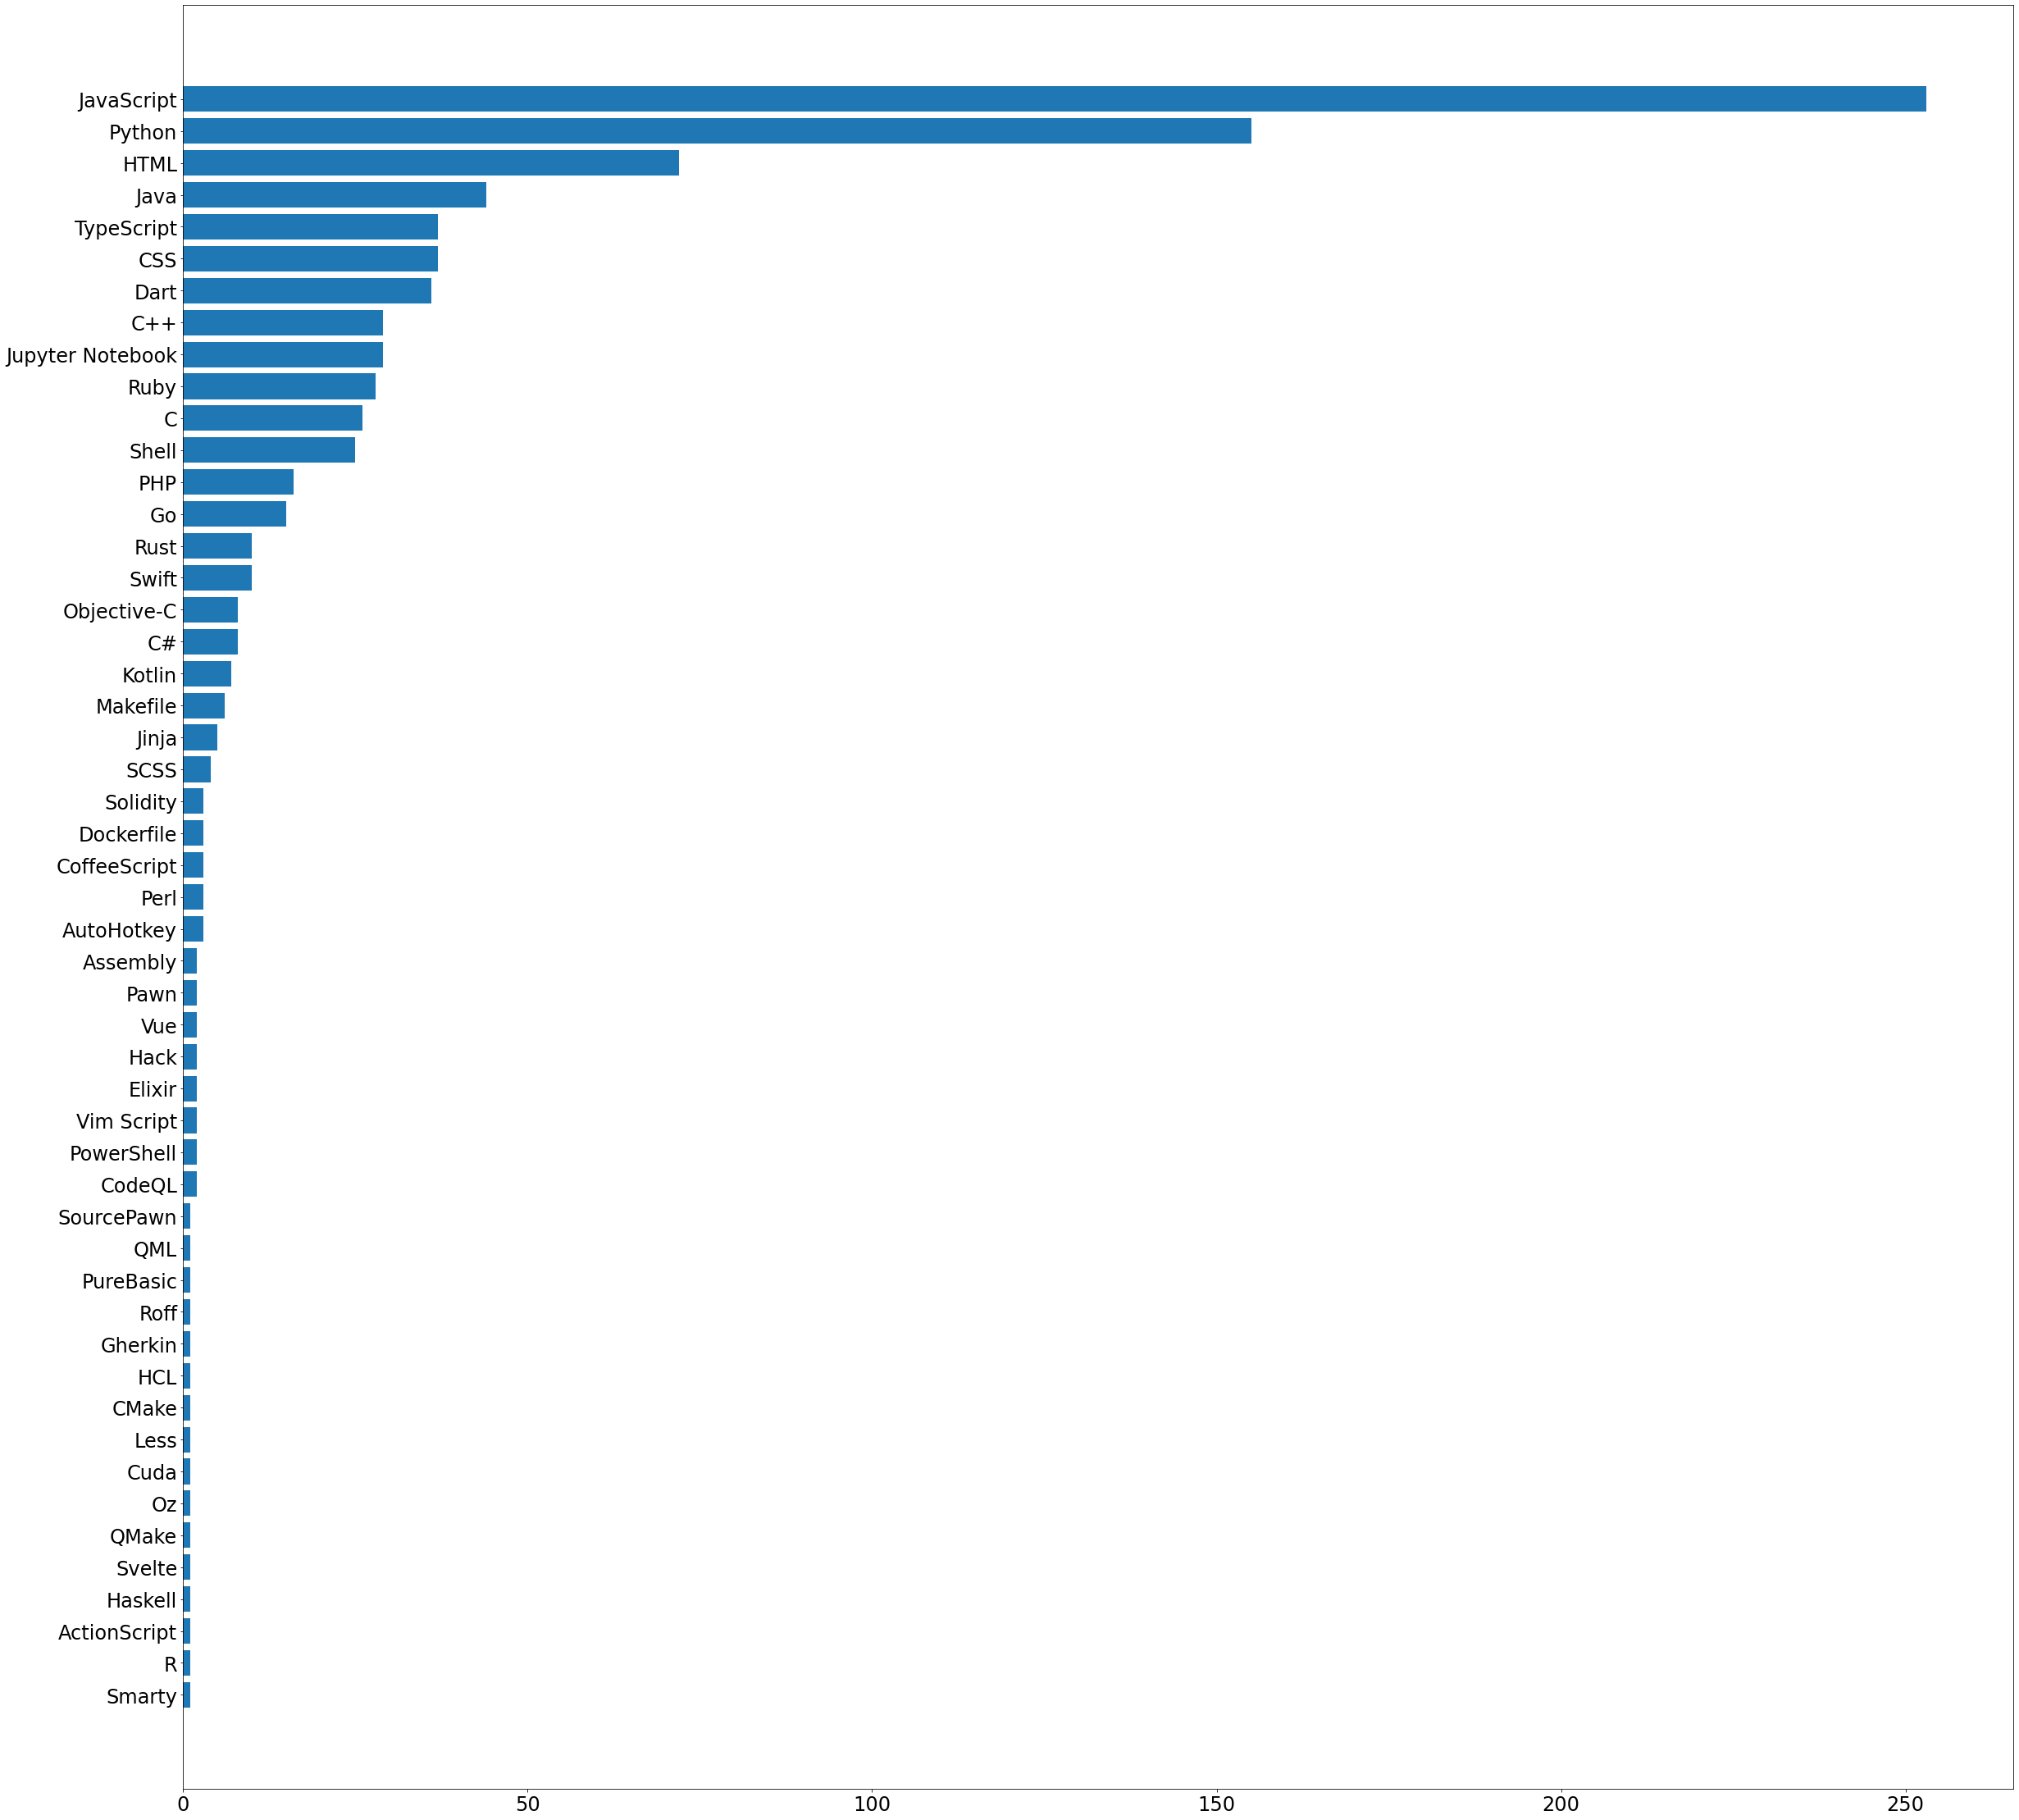

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
language_counts = pd.DataFrame(l_c).sort_values(by='language', ascending=True).rename(columns={'language': 'language_count'})
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(language_counts.index, width=language_counts['language_count'])

利用直方图、盒图等检查数据分布及离群点

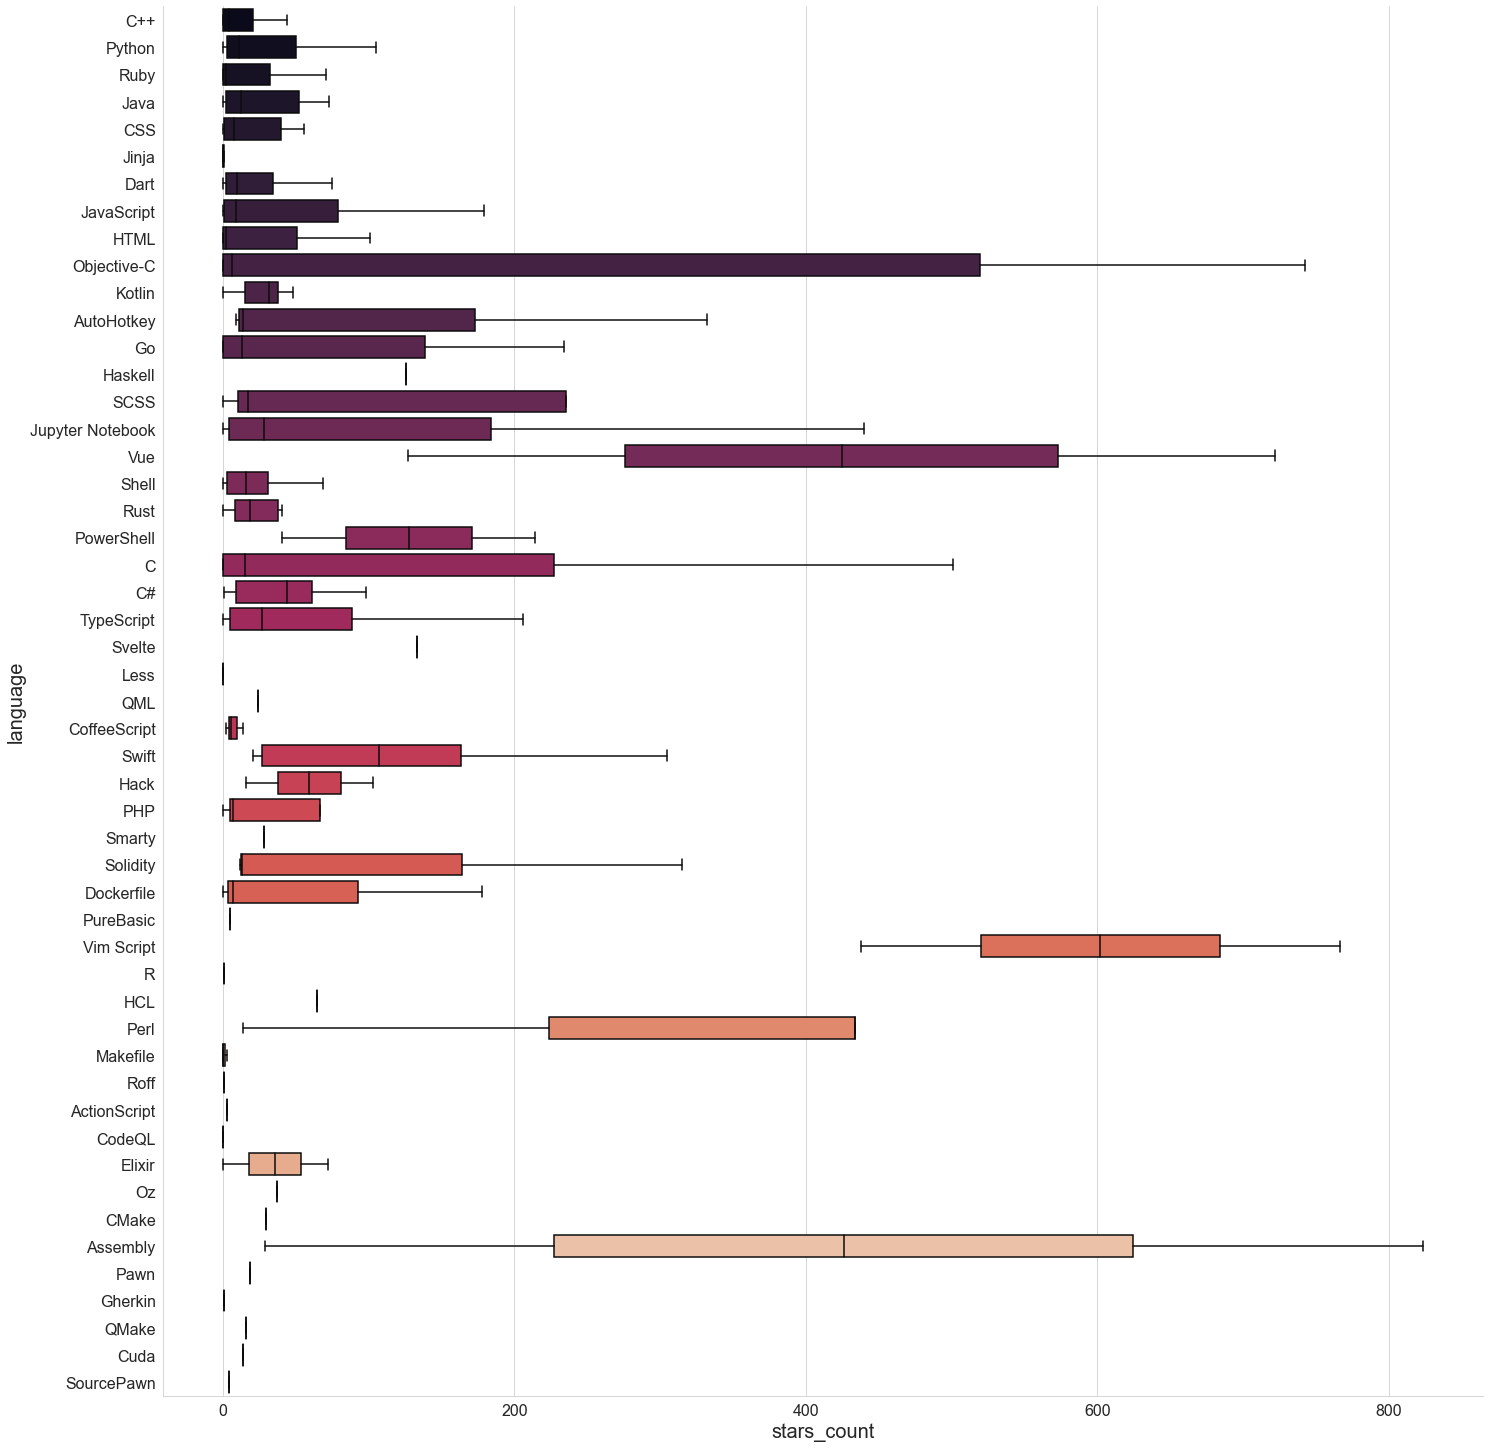

In [13]:
sns.set_style("whitegrid")
stars_count_box = sns.catplot(data=github_data, kind='box', y='language', x='stars_count', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('stars_count', fontsize=20)
plt.show()

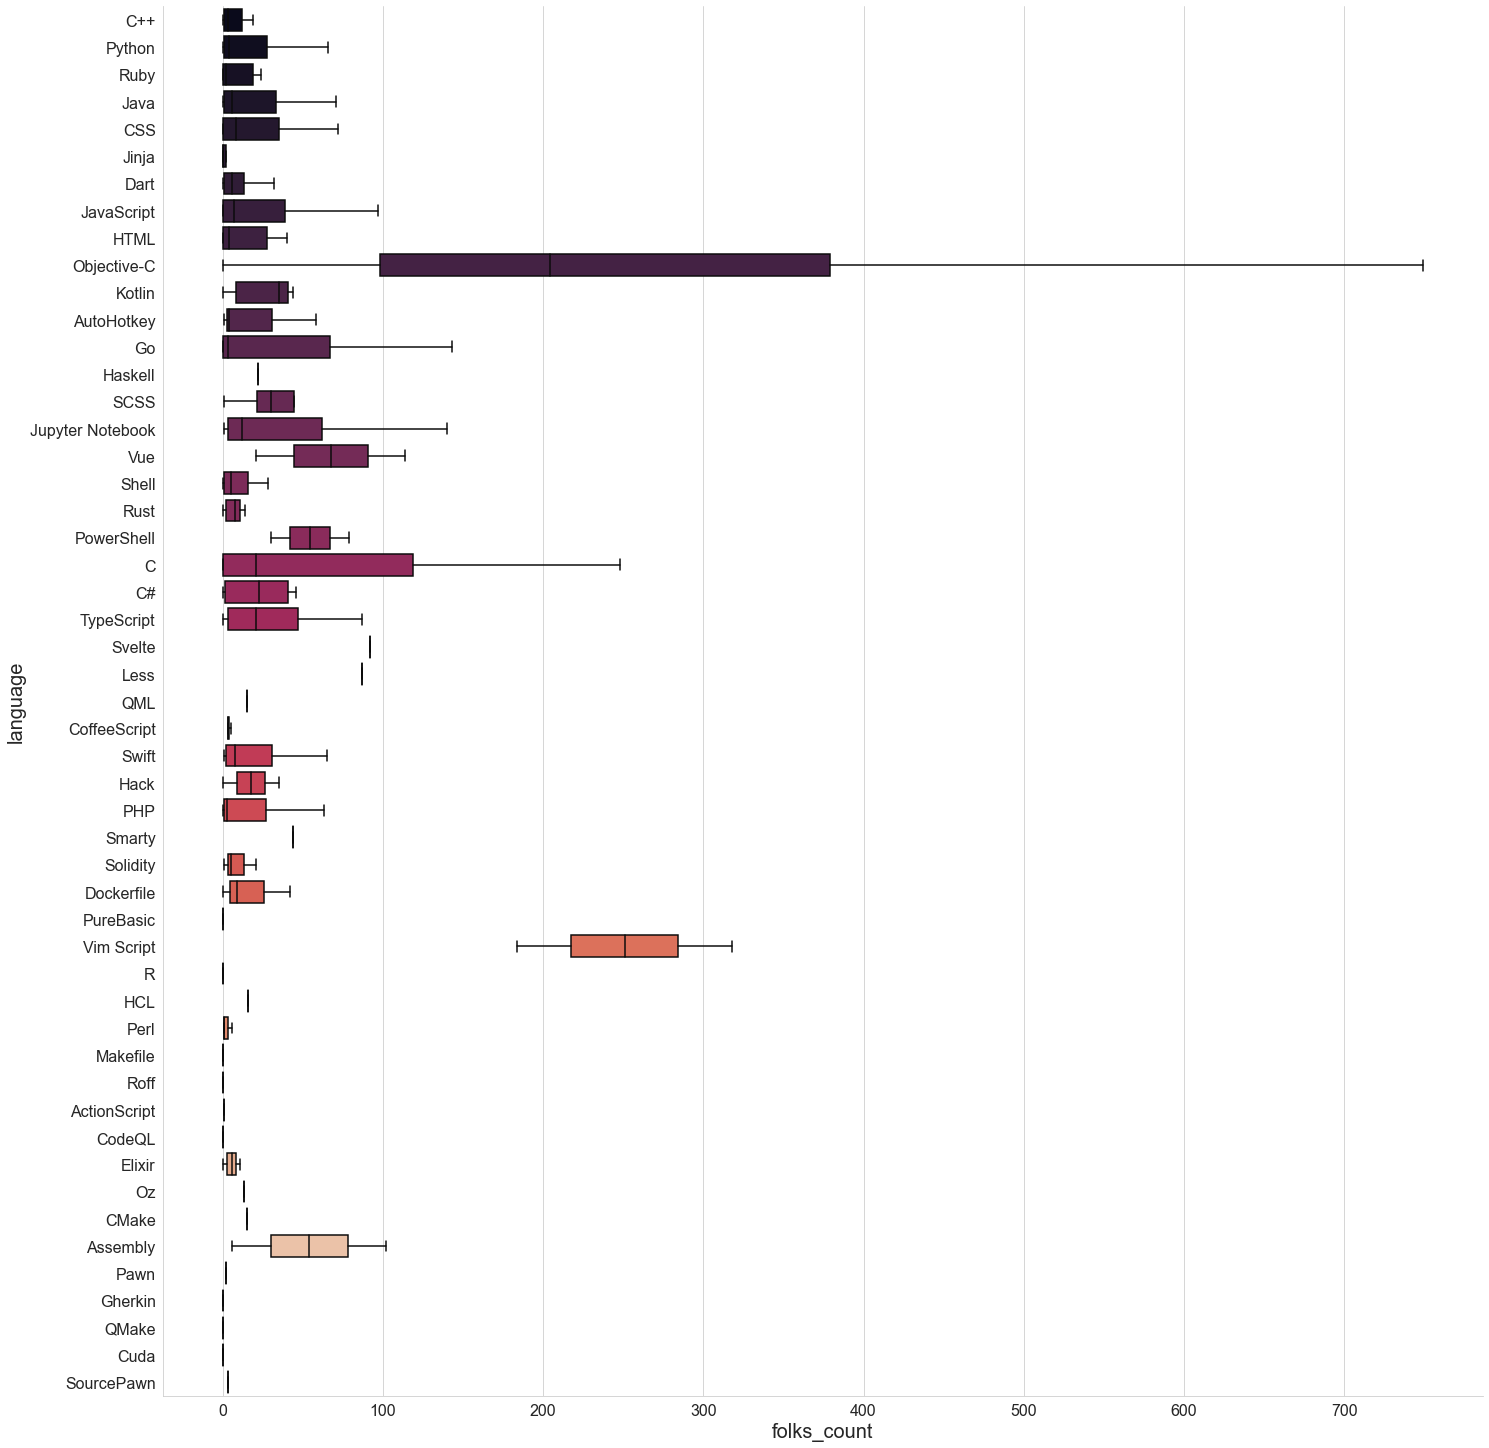

In [14]:
sns.set_style("whitegrid")
forks_count_box = sns.catplot(data=github_data, kind='box', y='language', x='forks_count', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('folks_count', fontsize=20)
plt.show()

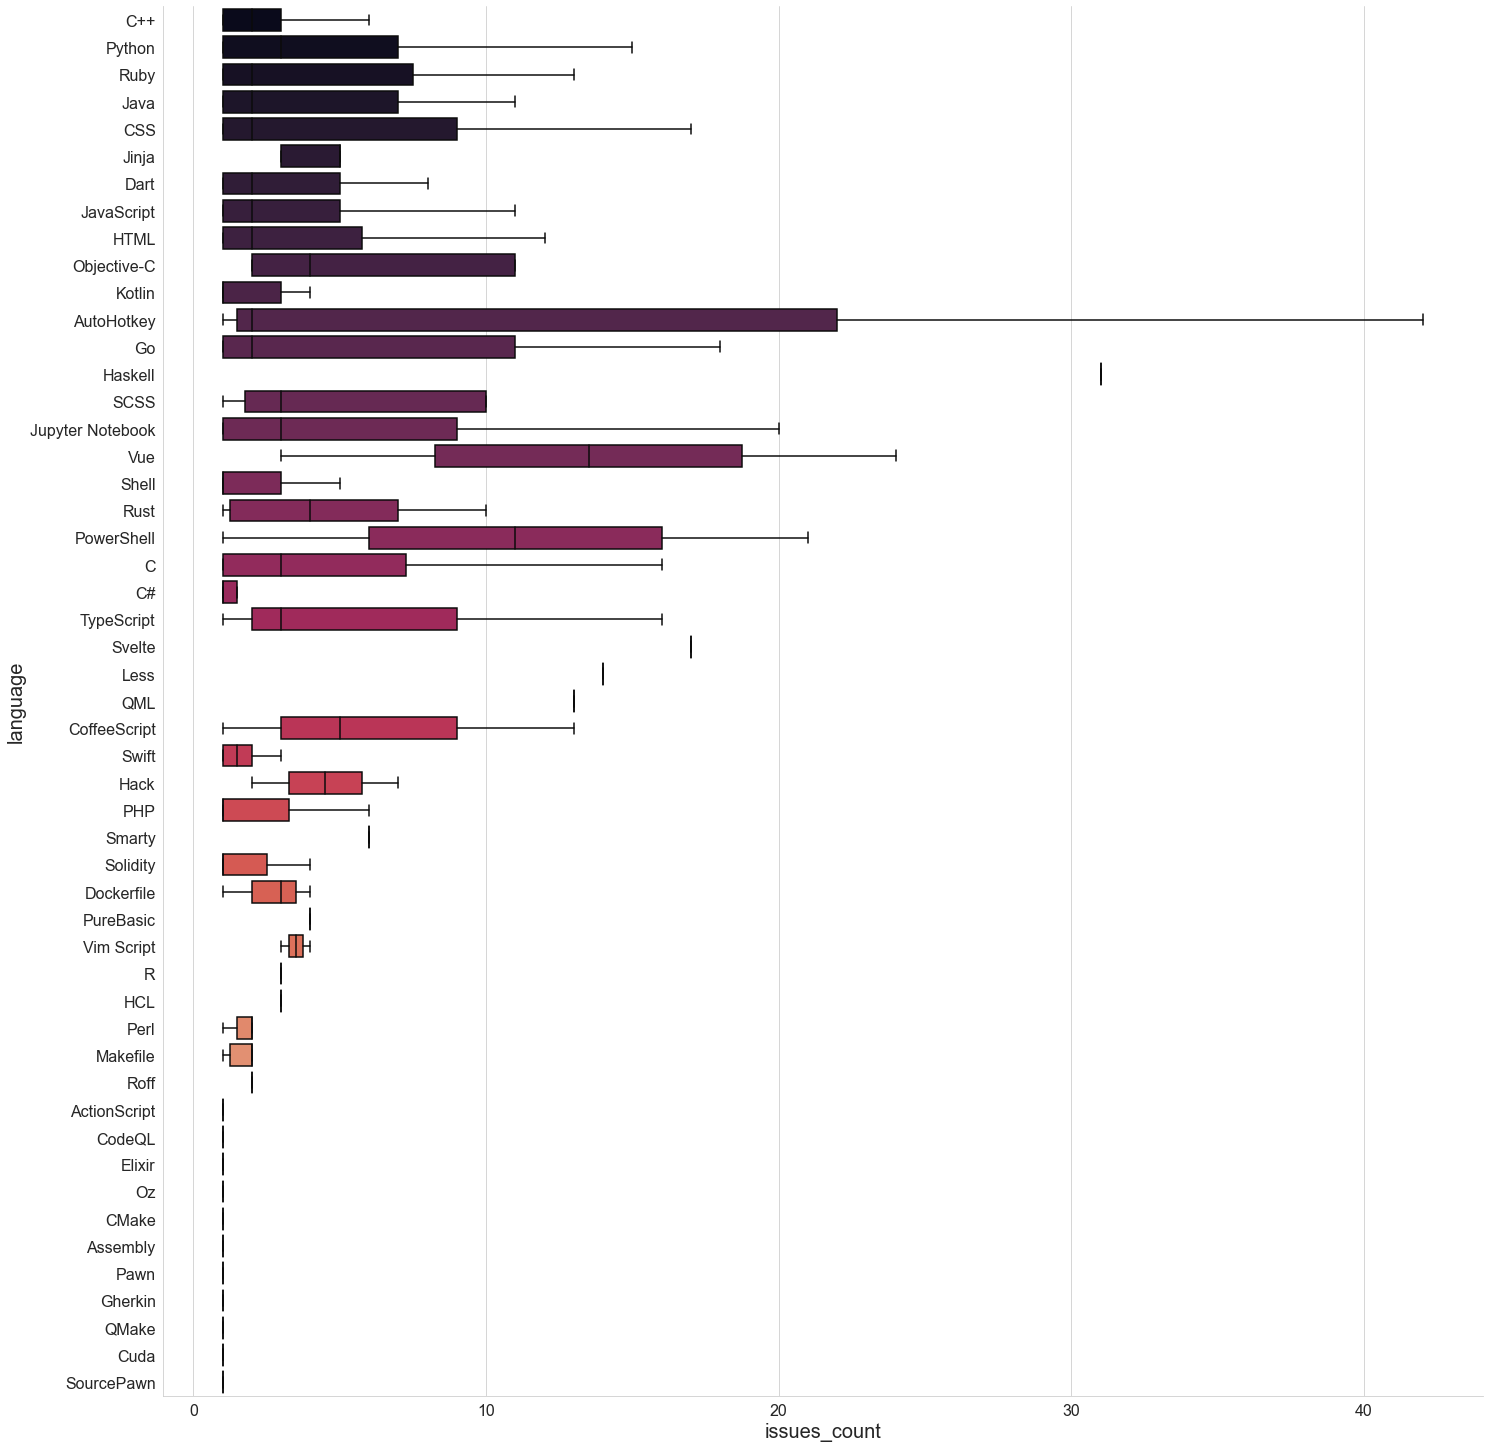

In [15]:
sns.set_style("whitegrid")
issues_count_box = sns.catplot(data=github_data, kind='box', y='language', x='issues_count', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('issues_count', fontsize=20)
plt.show()

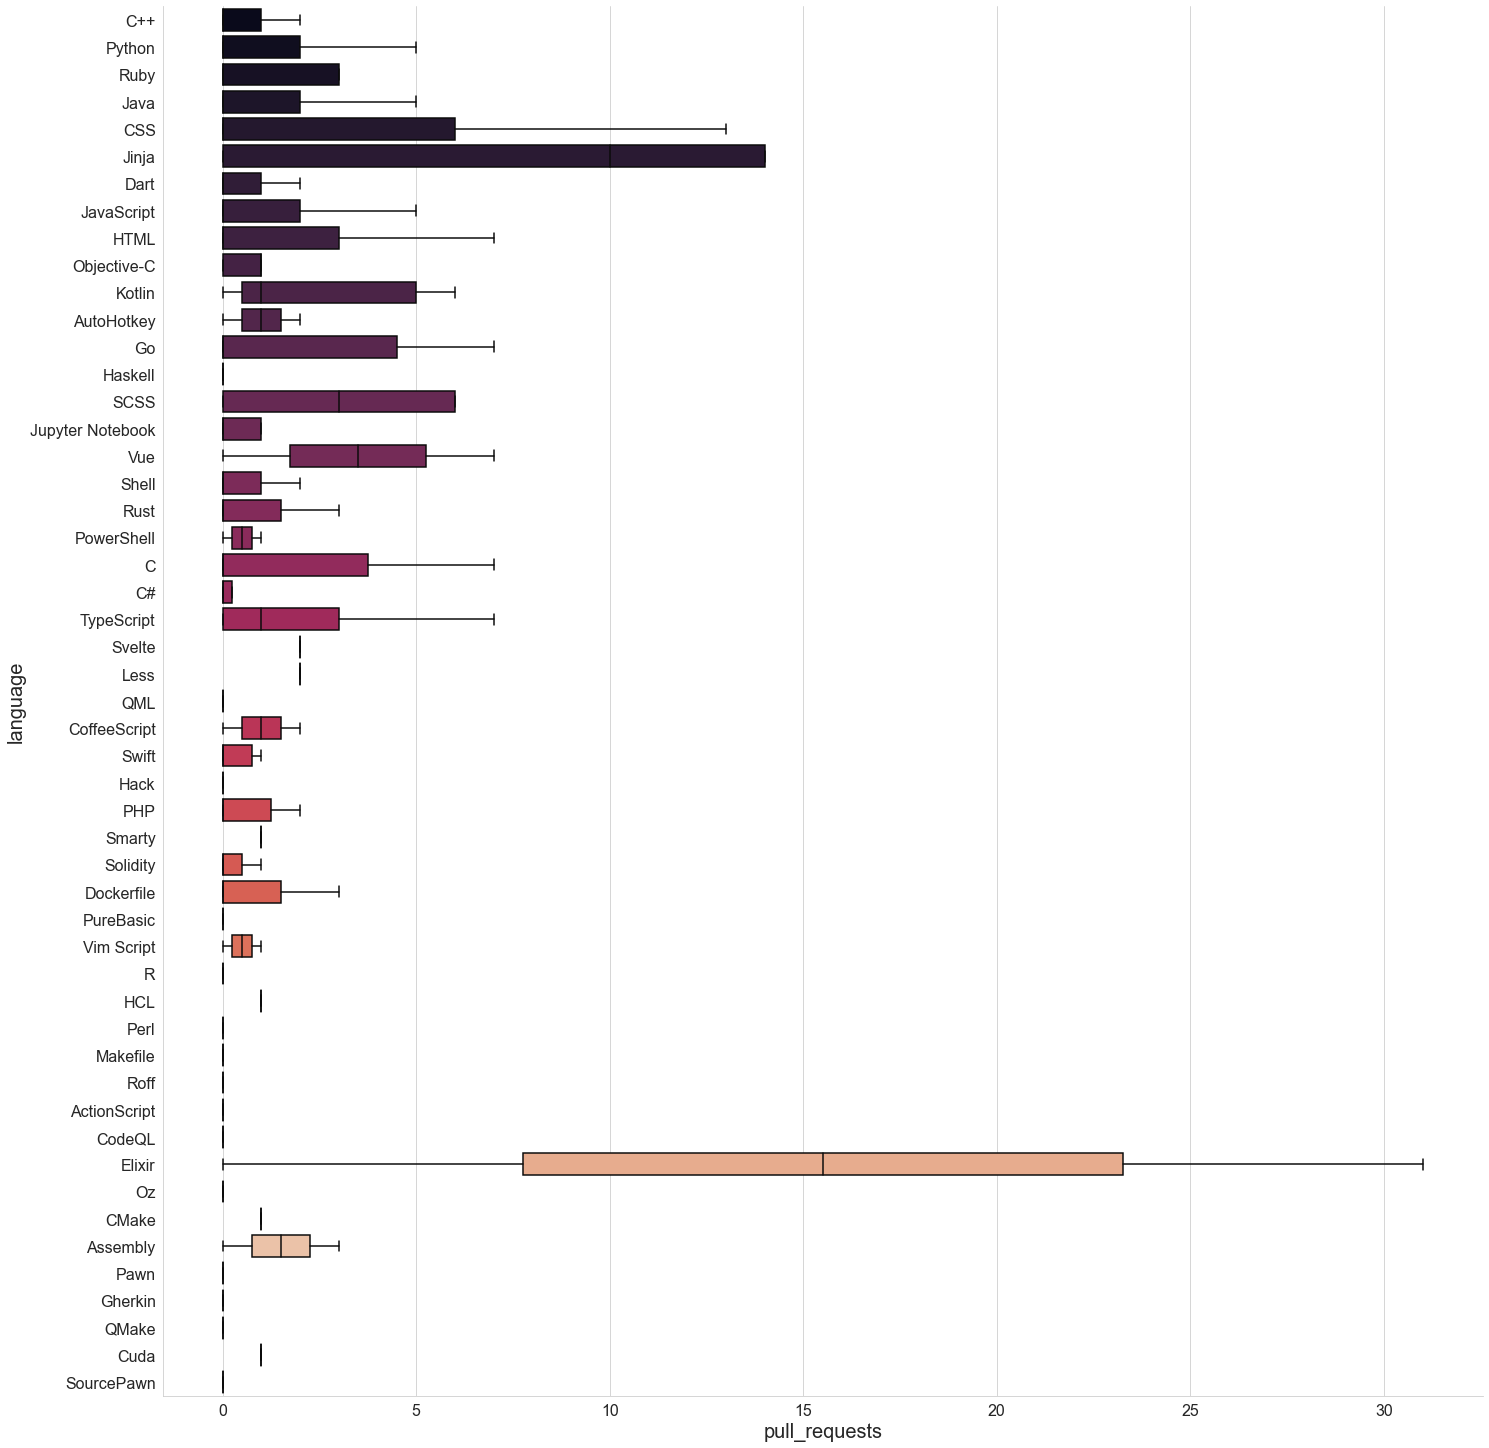

In [16]:
sns.set_style("whitegrid")
pull_requests_box = sns.catplot(data=github_data, kind='box', y='language', x='pull_requests', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('pull_requests', fontsize=20)
plt.show()

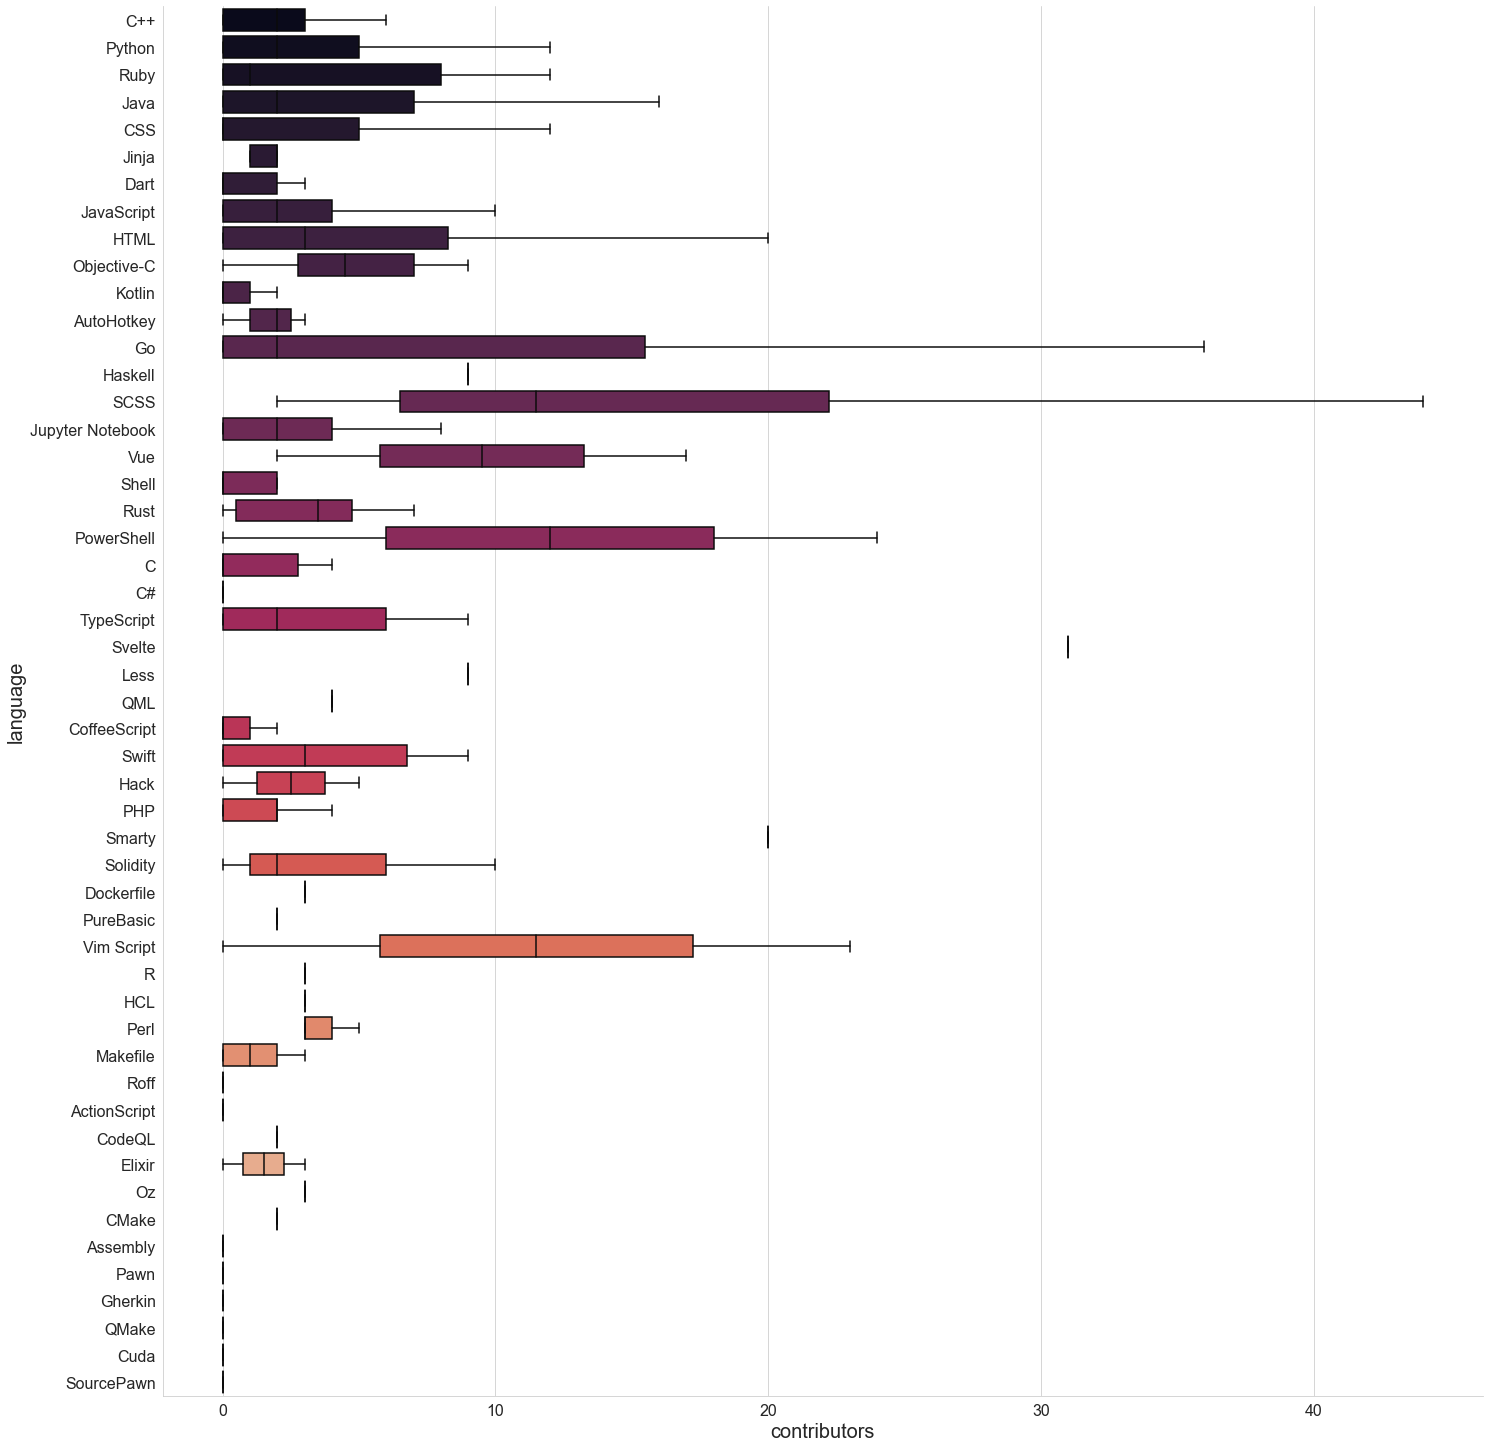

In [17]:
sns.set_style("whitegrid")
contributors_box = sns.catplot(data=github_data, kind='box', y='language', x='contributors', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('contributors', fontsize=20)
plt.show()

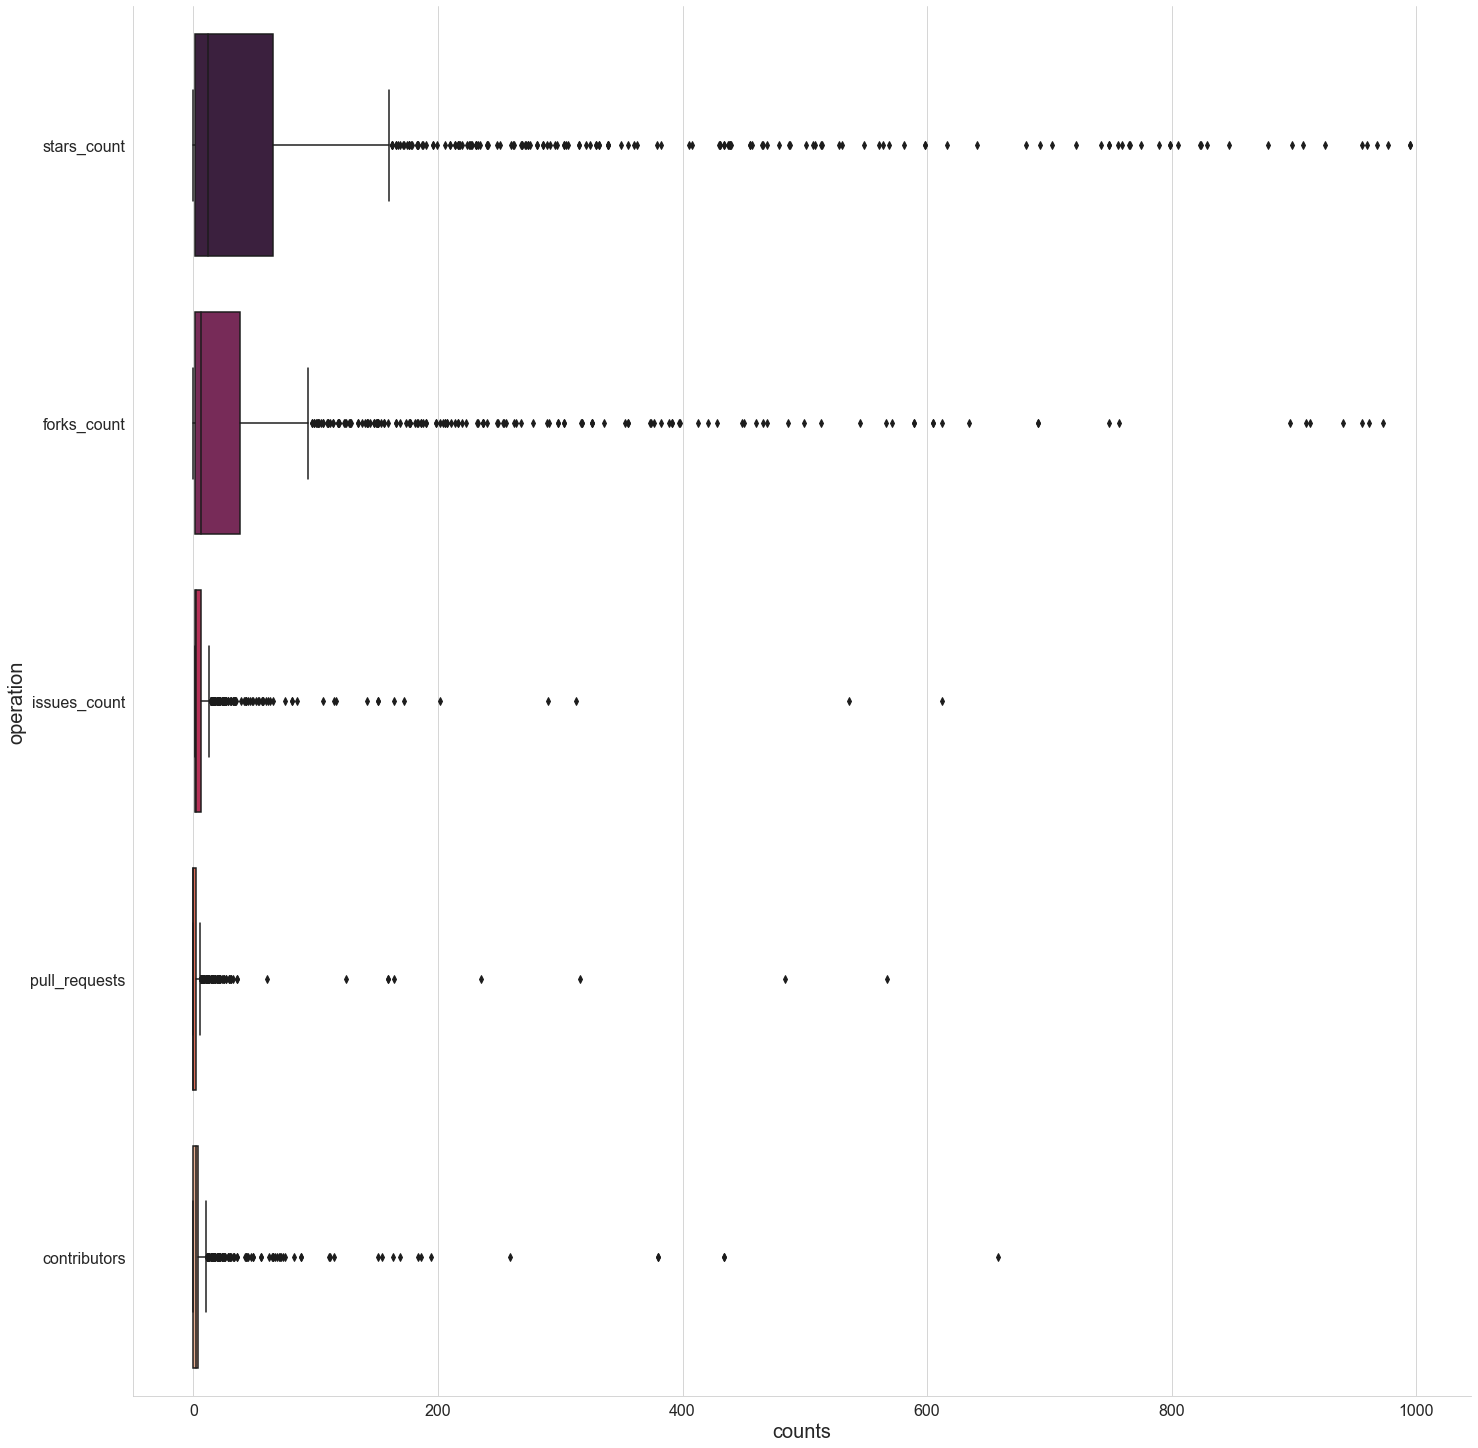

In [18]:
operation_counts = pd.DataFrame(list(github_data['stars_count']), columns=['counts'])
operation_counts = pd.DataFrame(operation_counts, columns=['operation', 'counts'])
operation_counts['operation'] = 'stars_count'

operation_counts = operation_counts.append(pd.DataFrame([['forks_count', c] for c in list(github_data['forks_count'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts = operation_counts.append(pd.DataFrame([['issues_count', c] for c in list(github_data['issues_count'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts = operation_counts.append(pd.DataFrame([['pull_requests', c] for c in list(github_data['pull_requests'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts = operation_counts.append(pd.DataFrame([['contributors', c] for c in list(github_data['contributors'])], columns=['operation', 'counts']), ignore_index=True)

stars_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20)
plt.xlabel('counts', fontsize=20)
plt.show()

## 数据缺失的处理

In [19]:
from numpy import nan as NA
github_data.isnull()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1047,False,False,False,False,False,False,False
1048,False,False,False,False,False,False,False
1049,False,False,False,False,False,False,False
1050,False,False,False,False,False,False,False


* 将缺失部分剔除

In [21]:
github_data1 = github_data.dropna()
github_data1

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
5,shobhit97/open-gpstracker,0,0,172,0,3,Java
6,donnemartin/system-design-primer,0,0,164,164,115,Python
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


将缺失部分剔除，可以发现，数据从1052行减少到907行，主要对于language进行处理。

* 用最高频率值来填补缺失值

In [22]:
language_HF = language_counts.index[-1] # 获得language中最高频率值，用来填充缺失值
print(language_HF) # 输出最高频率值
github_data2 = github_data.replace(np.nan, language_HF)
github_data2

JavaScript


,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,JavaScript
1,EddieHubCommunity/support,271,150,536,6,71,JavaScript
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


用最高评率值来填补缺失值，可以发现，language数据全部被替换为JavaScript。

* 通过属性的相关关系来填补缺失值

In [23]:
github_data3 = github_data
github_data3

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


In [24]:
github_data3 = pd.get_dummies(github_data, columns=['language'], dummy_na=True, drop_first=True) # 进行独热编码
correlation_matrix = github_data3.corr() # 获取数据之间的相关关系
print(correlation_matrix)

github_data3 = github_data
df1 = github_data3.groupby('language').agg(avg=('stars_count', 'mean'))

for i in range(len(github_data3)):
    if github_data3['language'].iloc[i] is NA:
        rate = github_data3['stars_count'].iloc[i] # 利用与langugage中相关关系最高的stars_count来对数据进行填充。
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        github_data3['language'].iloc[i] = df1.index[idx]
github_data3['language'].value_counts()

                           stars_count  forks_count  issues_count  \
stars_count                   1.000000     0.250037      0.060943   
forks_count                   0.250037     1.000000      0.123204   
issues_count                  0.060943     0.123204      1.000000   
pull_requests                -0.004548     0.048063      0.324541   
contributors                  0.059866     0.263042      0.382578   
language_Assembly             0.088153     0.000039     -0.010304   
language_AutoHotkey           0.011415    -0.013778      0.010460   
language_C                    0.066453     0.029164     -0.016629   
language_C#                  -0.019903    -0.021782     -0.013245   
language_C++                 -0.042313     0.008294      0.028994   
language_CMake               -0.009413    -0.009397     -0.007283   
language_CSS                 -0.036208    -0.041509      0.044346   
language_CodeQL              -0.021006    -0.018425     -0.010304   
language_CoffeeScript        -0.02

/Users/lansemenghuan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
TypeScript           38
Dart                 38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
Go                   17
PHP                  17
Perl                 14
ActionScript         12
Kotlin               10
C#                   10
Rust                 10
Swift                10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Gherkin               7
SCSS                  7
Cuda                  7
SourcePawn            6
Makefile              6
QMake                 5
AutoHotkey            5
Jinja                 5
Assembly              4
Hack                  4
PureBasic             4
Dockerfile            3
Solidity              3
HCL                   3
CMake                 3
QML                   3
Smarty          

In [25]:
github_data3

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,CodeQL
1,EddieHubCommunity/support,271,150,536,6,71,Perl
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


* 通过数据对象之间的相似性来填补缺失值

In [26]:
github_data3['language'].value_counts()

JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
TypeScript           38
Dart                 38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
Go                   17
PHP                  17
Perl                 14
ActionScript         12
Kotlin               10
C#                   10
Rust                 10
Swift                10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Gherkin               7
SCSS                  7
Cuda                  7
SourcePawn            6
Makefile              6
QMake                 5
AutoHotkey            5
Jinja                 5
Assembly              4
Hack                  4
PureBasic             4
Dockerfile            3
Solidity              3
HCL                   3
CMake                 3
QML                   3
Smarty          

In [27]:
github_data4 = github_data

In [28]:
def regularit(df):
    new_df = pd.DataFrame(index=df.index)
    columns = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d - MIN) / (d - MAX))
    return new_df
github_data5 = regularit(github_data4)
github_data5

,stars_count,forks_count,issues_count,pull_requests,contributors
0,-0.000000,-0.000000,inf,-1.258964,-0.003049
1,-0.374309,-0.182260,-7.039474,-0.010695,-0.120954
2,-0.000000,-0.000000,-1.043478,-0.050000,-0.305556
3,-0.000000,-0.000000,-0.897516,-0.055866,-1.937500
4,-0.000000,-1.533854,-0.490244,-0.040367,-0.113367
...,...,...,...,...,...
1047,-0.002014,-0.001029,-0.000000,-0.000000,-0.000000
1048,-0.000000,-0.000000,-0.000000,-0.000000,-0.012308
1049,-0.000000,-0.005165,-0.000000,-0.001767,-0.010753
1050,-0.011179,-0.005165,-0.000000,-0.000000,-0.000000


In [29]:
language = pd.concat([github_data5, github_data4['language']], axis=1)
language

,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,-0.000000,-0.000000,inf,-1.258964,-0.003049,CodeQL
1,-0.374309,-0.182260,-7.039474,-0.010695,-0.120954,Perl
2,-0.000000,-0.000000,-1.043478,-0.050000,-0.305556,C++
3,-0.000000,-0.000000,-0.897516,-0.055866,-1.937500,Python
4,-0.000000,-1.533854,-0.490244,-0.040367,-0.113367,Ruby
...,...,...,...,...,...,...
1047,-0.002014,-0.001029,-0.000000,-0.000000,-0.000000,Dart
1048,-0.000000,-0.000000,-0.000000,-0.000000,-0.012308,HTML
1049,-0.000000,-0.005165,-0.000000,-0.001767,-0.010753,Python
1050,-0.011179,-0.005165,-0.000000,-0.000000,-0.000000,JavaScript


In [30]:
for i in range(len(language)):
    if pd.isna(language['language'].iloc[i]):
        dists = []
        for j in range(len(rates)):  # corrected range usage
            dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        github_data4.at[i, 'language'] = github_data4.at[idx, 'language']

github_data4['language'].value_counts()

JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
TypeScript           38
Dart                 38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
Go                   17
PHP                  17
Perl                 14
ActionScript         12
Kotlin               10
C#                   10
Rust                 10
Swift                10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Gherkin               7
SCSS                  7
Cuda                  7
SourcePawn            6
Makefile              6
QMake                 5
AutoHotkey            5
Jinja                 5
Assembly              4
Hack                  4
PureBasic             4
Dockerfile            3
Solidity              3
HCL                   3
CMake                 3
QML                   3
Smarty          

这个方法和之前的数据相差不大，由于在这个数据集中用的计数属性是高度相关的，所以区别不大。

##  Movies Dataset from Pirated Sites 数据集

In [31]:
import numpy as np 
import pandas as pd #调用numpy和pandas库 读取数据
import matplotlib.pyplot as plt
import seaborn as sns
# Load data set.
movie_data = pd.read_csv('/Users/lansemenghuan/data mining homework/movies_dataset-数据集2.csv')

# Check the columns.
movie_data.columns

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

## 数据标数属性 和 数值属性

In [32]:
movie_data = movie_data.drop(columns = 'Unnamed: 0')

In [33]:
appropriate_for，director，industry，language，posted_date，release_date，storyline，title，writer为数据标数属性。
IMDb-rating，downloads，id，run_time，views为数值属性。

SyntaxError: invalid character '，' (U+FF0C) (3506398313.py, line 1)

In [34]:
 #去掉无意义的计数列
def data_type(mov_data): # 统计缺失值的数量和数据的type
    cols, dtype, specimens, num_unique, null_share = [], [], [], [], []

    for column in mov_data:
        cols.append(column)
        col_dtype = mov_data[column].dtype
        dtype.append(col_dtype)
        
        specimen = mov_data.loc[mov_data[column].first_valid_index(), column] # 获取示例
        specimens.append(specimen)
        num_unique.append(mov_data[column].nunique()) # 统计单独的数据
        
        null_sum = mov_data[column].isna().sum()
        null_to_len = null_sum / len(mov_data[column])
        null_share.append(f'{null_to_len:.2%}')
        
    df = pd.DataFrame(list(zip(dtype, specimens, num_unique, null_share)), index=cols)    
    df.columns=['dtype', 'eg.','num_unique',  'null_share']
 
    return df

data_type(movie_data)

,dtype,eg.,num_unique,null_share
IMDb-rating,float64,4.8,85,4.09%
appropriate_for,object,R,21,46.12%
director,object,John Swab,9672,9.43%
downloads,object,304,10625,0.00%
id,int64,372092,17086,0.00%
industry,object,Hollywood / English,10,0.00%
language,object,English,1168,2.64%
posted_date,object,"20 Feb, 2023",4123,0.00%
release_date,object,Jan 28 2023,4886,0.00%
run_time,object,105,415,8.60%


In [35]:
for col in 'downloads', 'views': # 将downloads和views属性替换为float，否则无法进行数值相关性计算
    movie_data[col] = movie_data[col].str.replace(',','')
    movie_data[col] = movie_data[col].astype('float')

movie_data['id'] = movie_data['id'].astype('str')
data_type(movie_data)

,dtype,eg.,num_unique,null_share
IMDb-rating,float64,4.8,85,4.09%
appropriate_for,object,R,21,46.12%
director,object,John Swab,9672,9.43%
downloads,float64,304.0,10625,0.00%
id,object,372092,17086,0.00%
industry,object,Hollywood / English,10,0.00%
language,object,English,1168,2.64%
posted_date,object,"20 Feb, 2023",4123,0.00%
release_date,object,Jan 28 2023,4886,0.00%
run_time,object,105,415,8.60%


In [36]:
Ir_c = movie_data['IMDb-rating'].value_counts() # 数值属性
Ir_d = movie_data['IMDb-rating'].describe()
Ir_c, Ir_d

(6.6    829
 5.0    774
 5.7    747
 6.1    724
 5.5    707
       ... 
 1.1      2
 9.9      1
 9.5      1
 9.1      1
 1.3      1
 Name: IMDb-rating, Length: 85, dtype: int64,
 count    19707.000000
 mean         5.762151
 std          1.374041
 min          1.100000
 25%          4.800000
 50%          5.700000
 75%          6.600000
 max          9.900000
 Name: IMDb-rating, dtype: float64)

In [37]:
af_c = movie_data['appropriate_for'].value_counts()# 标数属性
af_c

R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
Passed               3
TV-Y7-FV             3
18+                  1
Drama                1
MA-17                1
Drama, Romance       1
TV-13                1
Name: appropriate_for, dtype: int64

In [38]:
dir_c = movie_data['director'].value_counts() # 标数属性
dir_c

Venky Atluri        405
Xavier Manrique     403
Simone Stock        403
Neil Jordan         205
John Swab           205
                   ... 
Oren Stambouli        1
Nathaniel Nuon        1
Daniel Adams          1
Ignacio Maiso         1
Jessie McCormack      1
Name: director, Length: 9672, dtype: int64

In [39]:
dow_c = movie_data['downloads'].value_counts() # 标数属性
dow_c

75.0       403
622.0      212
378.0      209
1782.0     187
466.0      170
          ... 
43344.0      1
10318.0      1
16697.0      1
3085.0       1
7357.0       1
Name: downloads, Length: 10625, dtype: int64

In [40]:
movie_data['id'].value_counts() # data的id频率

371877    402
371744    402
372090    402
371671    202
371991    202
         ... 
114756      1
332223      1
6267        1
324506      1
253146      1
Name: id, Length: 17086, dtype: int64

In [41]:
movie_data['industry'].value_counts()

Hollywood / English    14649
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1049
Wrestling                433
Punjabi                  332
Stage shows              129
Pakistani                 92
Dub / Dual Audio          45
3D Movies                  1
Name: industry, dtype: int64

In [42]:
movie_data['language'].value_counts()

English                                       12657
Hindi                                          2558
English,Spanish                                 391
Punjabi                                         310
English,Hindi                                   304
                                              ...  
English,Bulgarian,Hebrew,Romanian,Croatian        1
Hindi,Kashmiri,Punjabi                            1
English,Japanese,Spanish,Korean                   1
English,Hindi,Tamil,French,Sanskrit               1
Hindi,Marathi,Punjabi,Tamil,English               1
Name: language, Length: 1168, dtype: int64

In [43]:
movie_data['posted_date'].value_counts()

13 Feb, 2023    812
15 Feb, 2023    607
20 Feb, 2023    607
10 Feb, 2023    485
16 Feb, 2023    406
               ... 
21 Dec, 2008      1
24 Nov, 2011      1
13 Mar, 2010      1
29 Aug, 1981      1
28 Jan, 2013      1
Name: posted_date, Length: 4123, dtype: int64

In [44]:
movie_data['release_date'].value_counts()

Jan 01 1970    962
Feb 03 2023    616
Feb 17 2023    607
Feb 10 2023    410
Feb 11 2023    402
              ... 
Feb 18 2000      1
May 18 2003      1
Aug 06 2002      1
Dec 30 2021      1
Jan 30 2018      1
Name: release_date, Length: 4886, dtype: int64

In [45]:
rt_c = movie_data['run_time'].value_counts()
rt_c

93         652
88         622
101        568
95         454
139        454
          ... 
199          1
144 min      1
55min        1
127 min      1
31min        1
Name: run_time, Length: 415, dtype: int64

In [46]:
movie_data['storyline'].value_counts()

The life of a young man and his struggles against the privatization of education.                                                                                                                                                                                                                                                                                                                                                                                                                                           402
It follows Kara Robinson as she survives an abduction and ultimately brings down a serial killer.                                                                                                                                                                                                                                                                                                                                                                                                       

In [47]:
movie_data['title'].value_counts()

The Girl Who Escaped: The Kara Robinson Story    402
Who Invited Charlie?                             402
Vaathi                                           402
The Inspection                                   202
Consent                                          202
                                                ... 
The Complex: Lockdown                              1
Lost Bullet 2 (Lost Bullet 2: Back for More)       1
Don't Come Back from the Moon                      1
Bronson                                            1
12 Round Gun                                       1
Name: title, Length: 16572, dtype: int64

In [48]:
v_c = movie_data['views'].value_counts()
v_c

6259.0     6
5869.0     5
5859.0     5
5603.0     5
4288.0     5
          ..
9366.0     1
18287.0    1
22099.0    1
36583.0    1
7803.0     1
Name: views, Length: 16821, dtype: int64

In [49]:
movie_data['writer'].value_counts()

Nicholas Schutt                                          403
Haley Harris                                             402
Venky Atluri                                             402
John Swab                                                205
John F. Hayes                                            202
                                                        ... 
Mordecai Richler, Michael Konyves                          1
Rohit Dhawan, Tushar Hiranandani, Hussain Dalal            1
Kevin Burke, Federico Fernandez-Armesto, Adam Gyngell      1
Suzanne DeLaurentiis                                       1
M. Parvez                                                  1
Name: writer, Length: 13603, dtype: int64

## 数据可视化

In [50]:
appropriate_count = pd.DataFrame(movie_data['appropriate_for'].value_counts()).rename(columns={'appropriate_for': 'appropriate_count'}).sort_values(by='appropriate_count', ascending=True)


In [51]:
movie_data['appropriate_for'] = movie_data['appropriate_for'].replace('Unrated', 'Not Rated')# 将全部的Unrated 替换成Not Rated

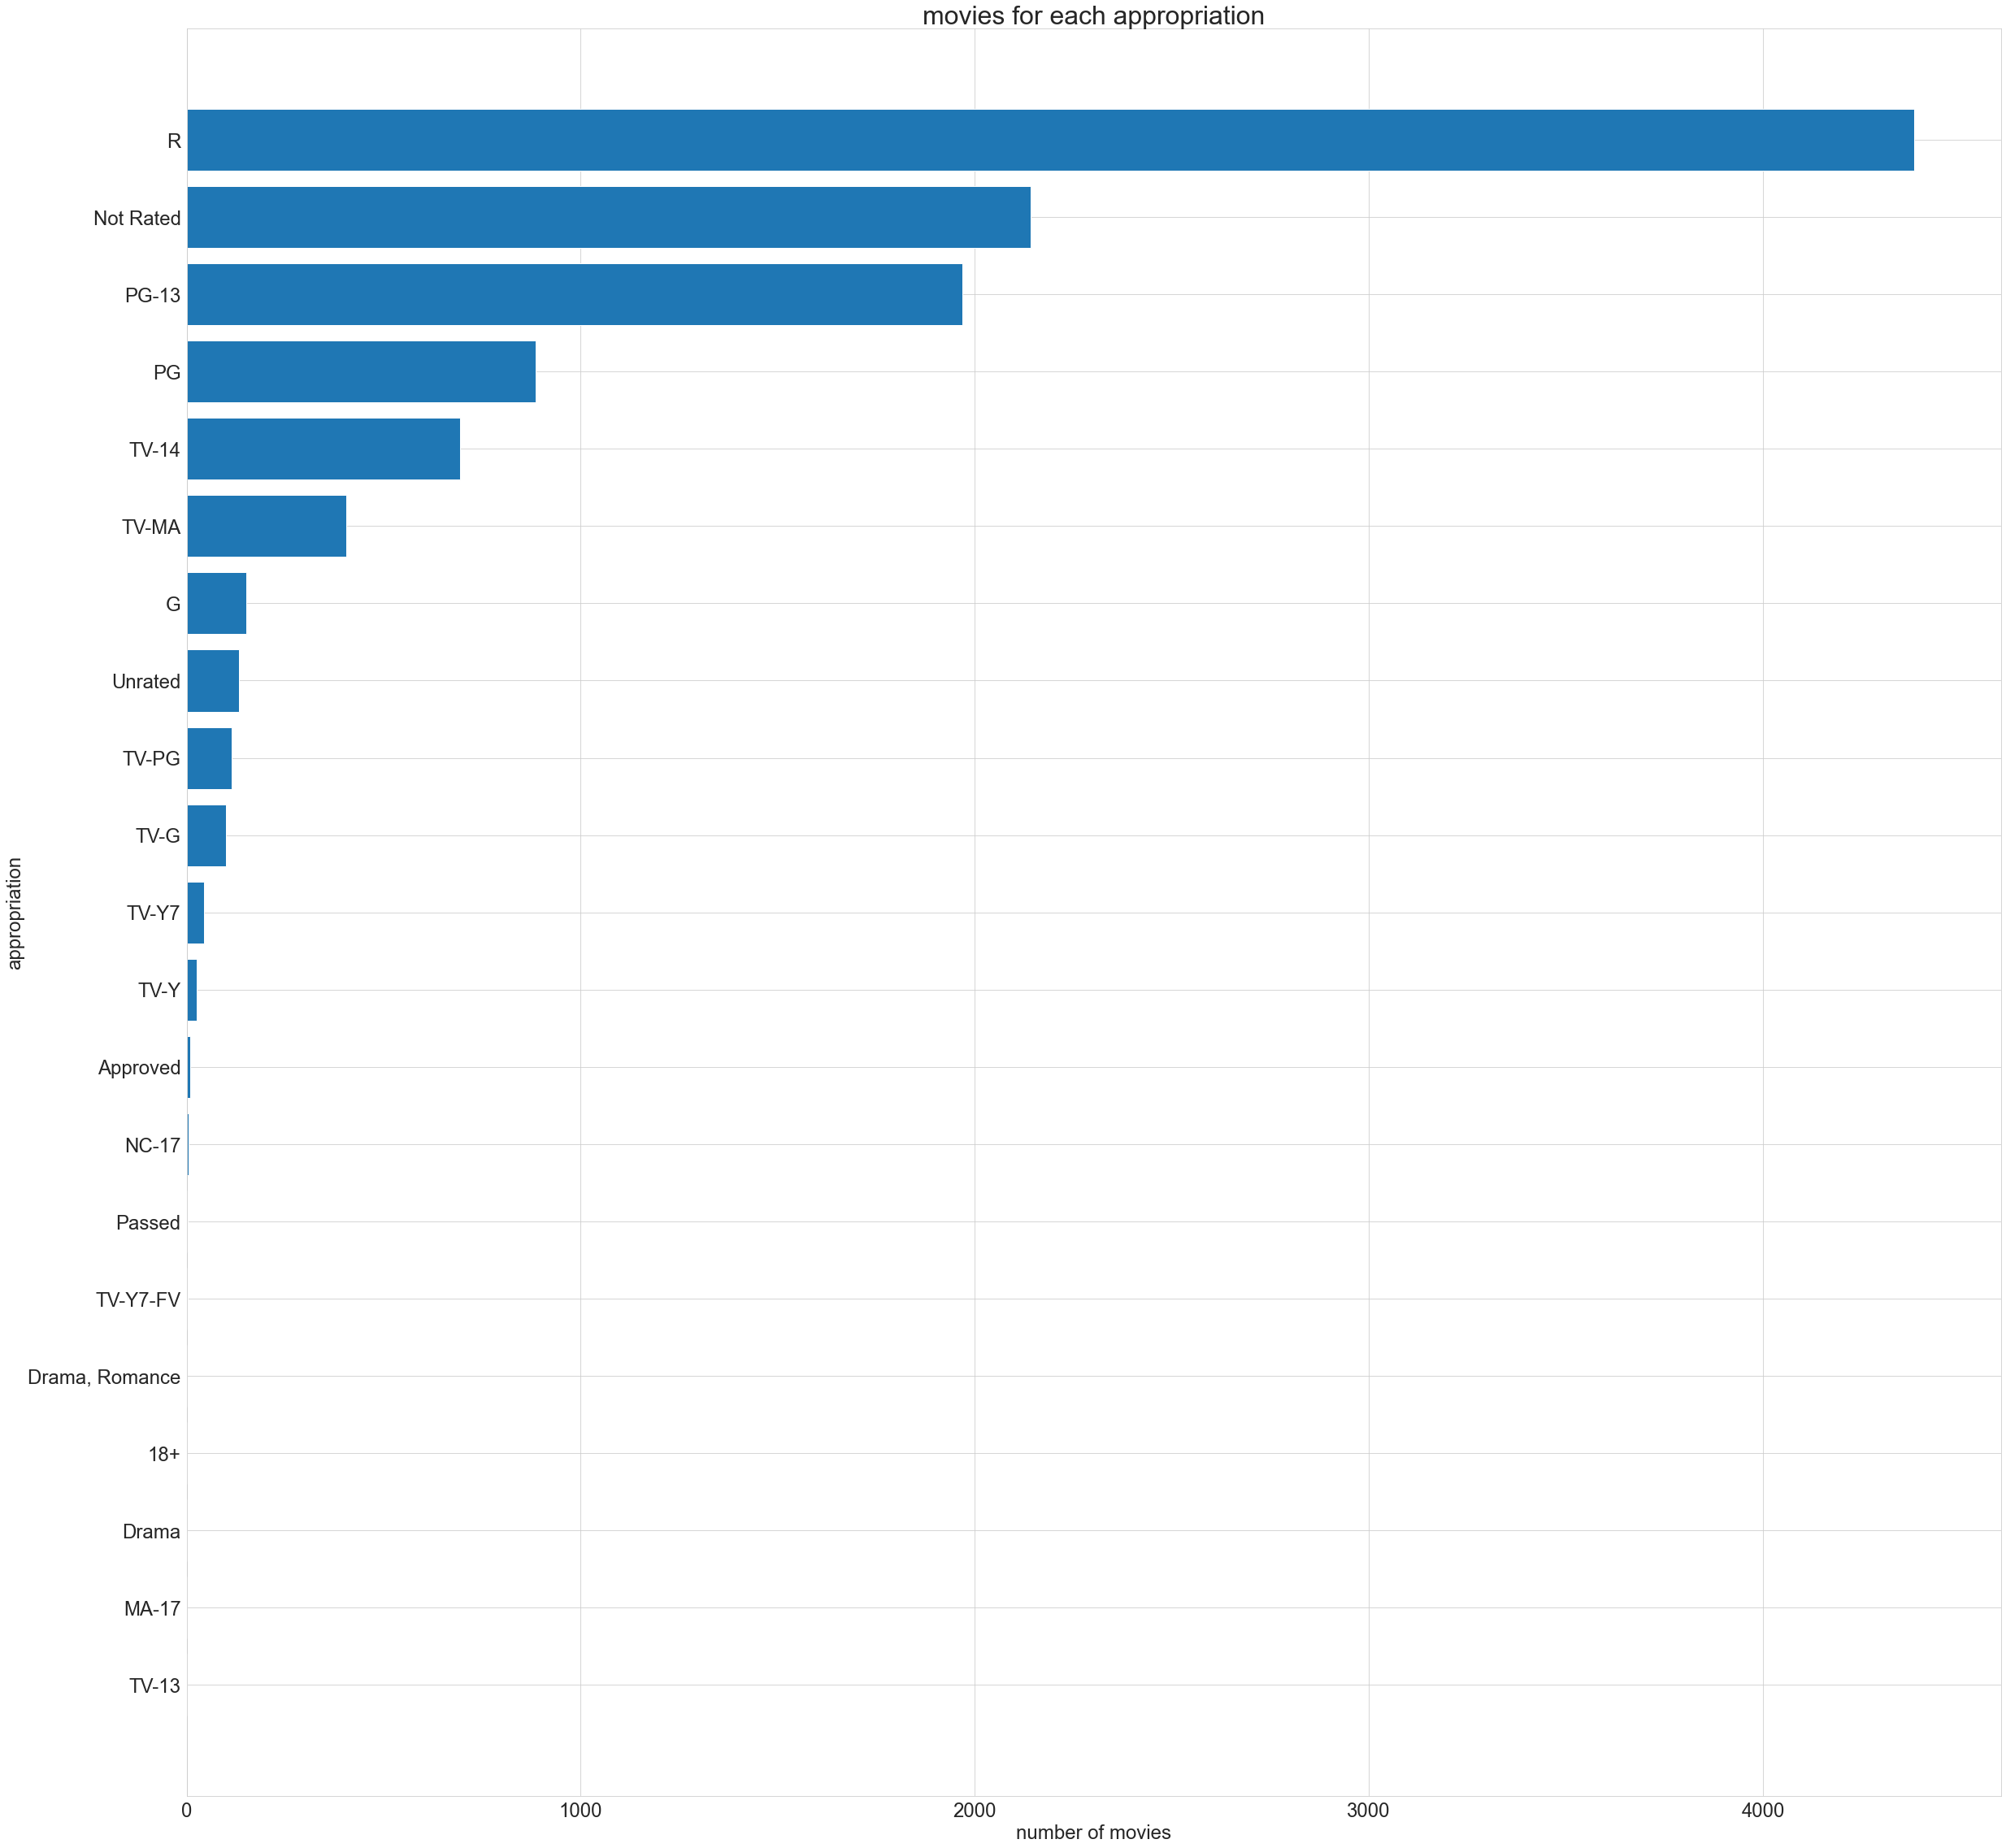

In [52]:
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(appropriate_count.index, width=appropriate_count['appropriate_count'])
plt.ylabel('appropriation', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('movies for each appropriation', fontsize=32, loc='center')
plt.show()

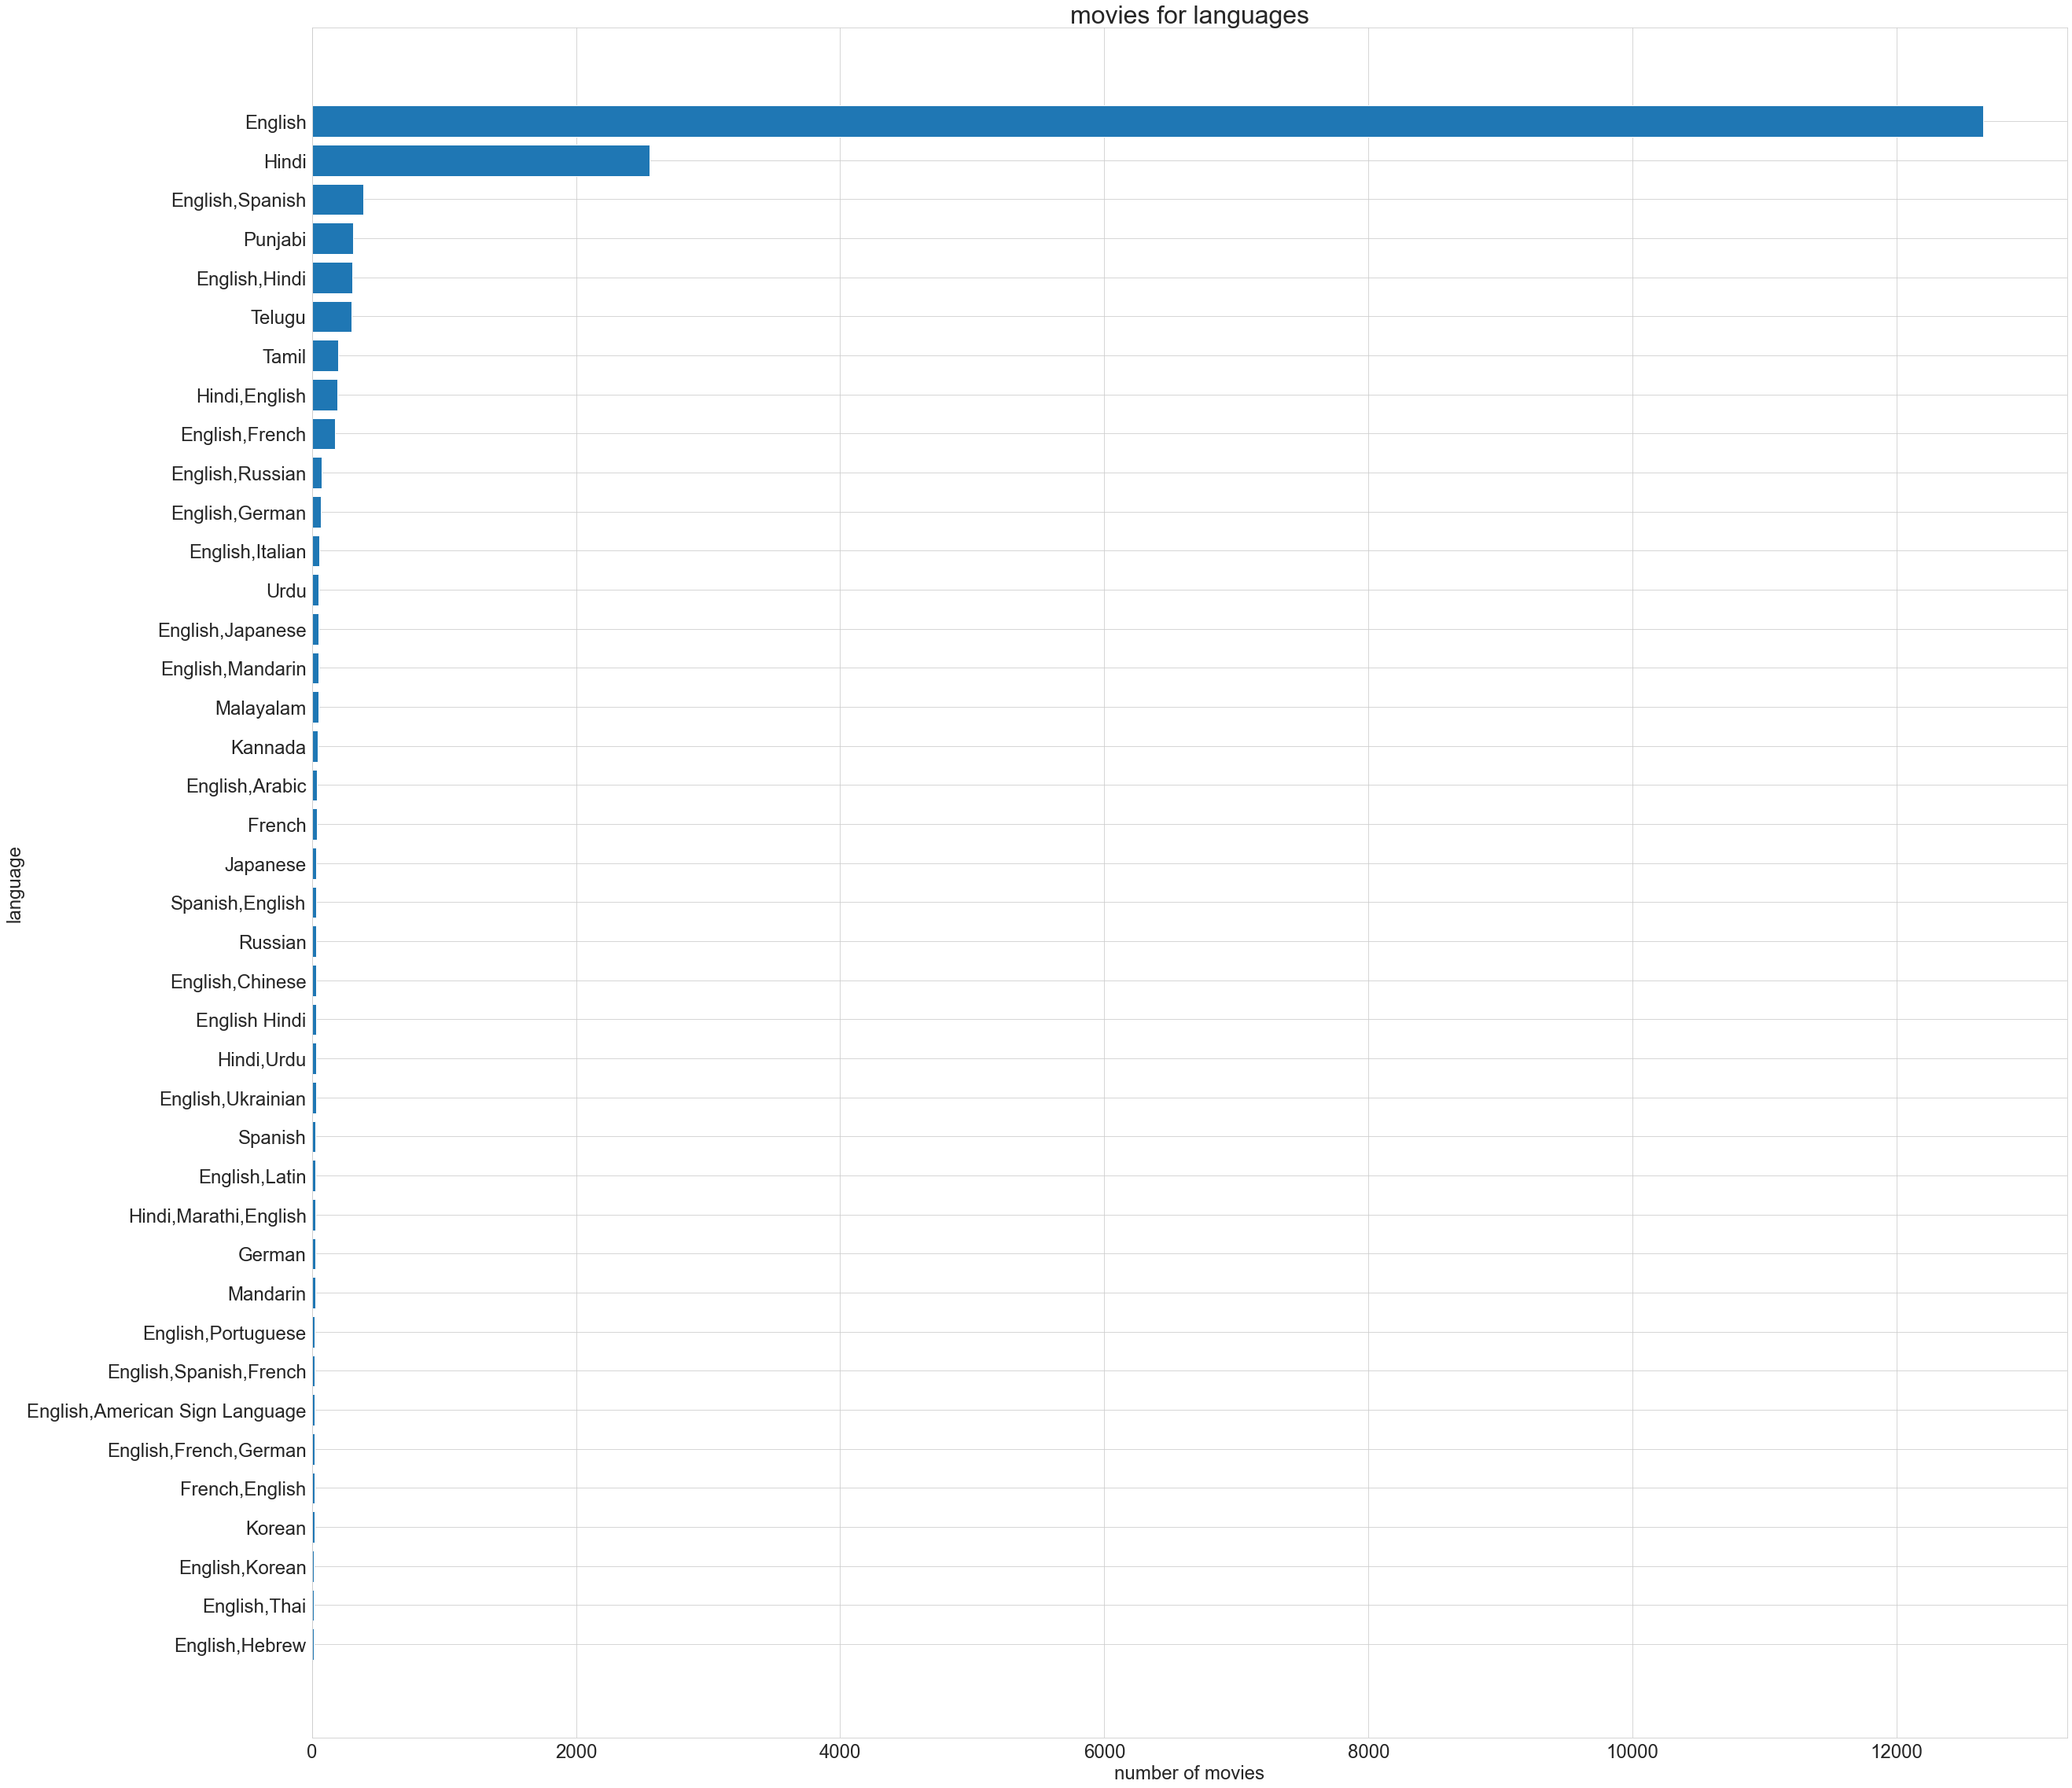

In [53]:
language_count = pd.DataFrame(movie_data['language'].value_counts()).rename(columns={'language': 'language_count'}).sort_values(by='language_count', ascending=True)
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(language_count.index[-40:], width=language_count['language_count'][-40:]) # 输出前40个的language
plt.ylabel('language', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('movies for languages', fontsize=32, loc='center')
plt.show()

利用盒图或者直方图进行数据可视化。

In [54]:
operation_counts = pd.DataFrame(list(movie_data['views']), columns=['counts'])
operation_counts = pd.DataFrame(operation_counts, columns=['operation', 'counts'])
operation_counts['operation'] = 'view'
operation_counts

,operation,counts
0,view,2794.0
1,view,1002.0
2,view,14419.0
3,view,4878.0
4,view,2438.0
...,...,...
20543,view,6219.0
20544,view,16376.0
20545,view,7220.0
20546,view,1419.0


In [55]:
operation_counts = operation_counts.append(pd.DataFrame([['download', c] for c in list(movie_data['downloads'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts

,operation,counts
0,view,2794.0
1,view,1002.0
2,view,14419.0
3,view,4878.0
4,view,2438.0
...,...,...
41091,download,1998.0
41092,download,6080.0
41093,download,3276.0
41094,download,309.0


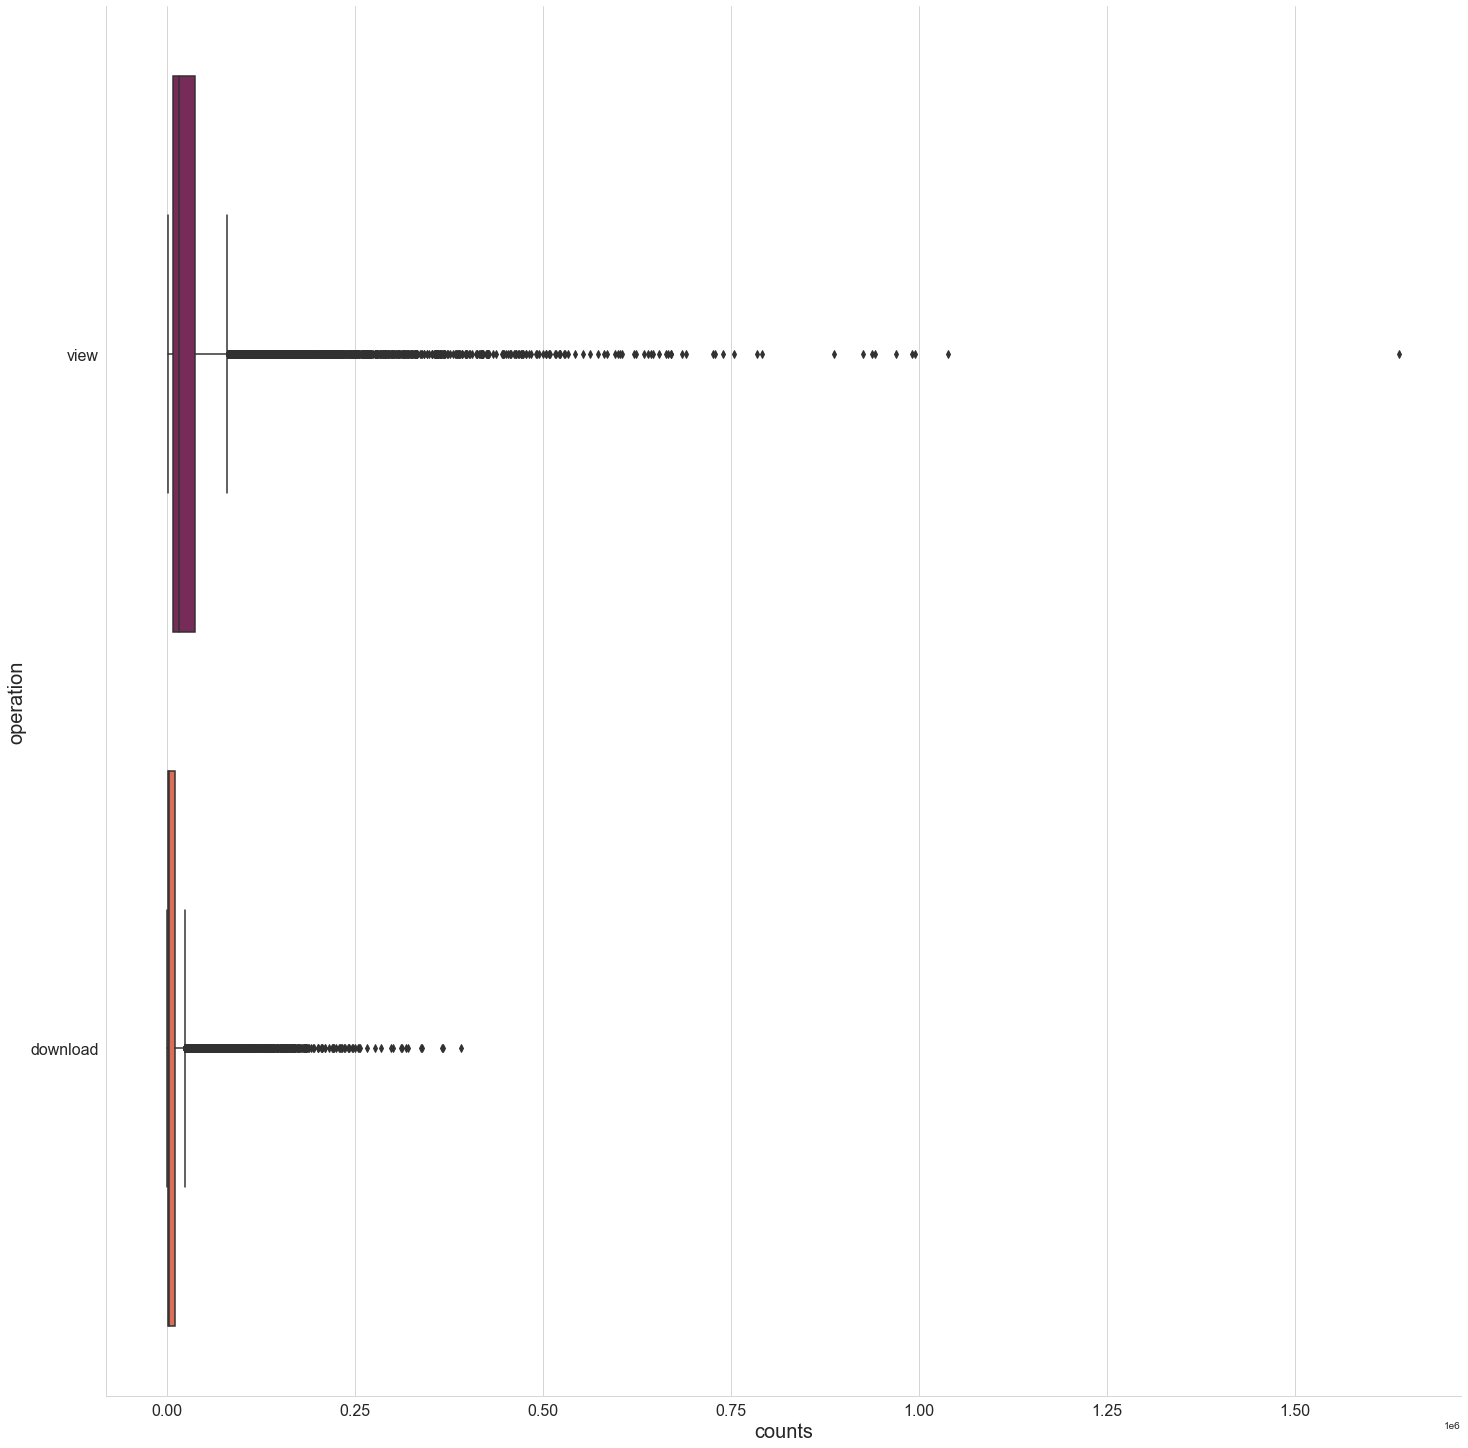

In [56]:
sns.set_style("whitegrid")
operation_counts['counts'] = operation_counts['counts'].astype(float)
operations_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20)
plt.xlabel('counts', fontsize=20)
plt.show()

## 数据缺失的处理

对于缺失数据的处理，由于downloads，id，industry，posted_date，release_date，title，views缺失率都为0.00%，所以在对于数据处理时可以略过这几列的数据。而对于其他数据，进行有效填充。
IMDb-rating		4.09%
appropriate_for		46.12%
director		9.43%
language		2.64%
run_time		8.60%
storyline		8.28%


In [57]:
from numpy import nan as NA
movie_data.isnull()

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,True,True,True,False,False,False,False,False,False,True,True,False,False,True
20544,False,True,False,False,False,False,False,False,False,False,False,False,False,False
20545,False,True,True,False,False,False,False,False,False,False,False,False,False,True
20546,True,True,True,False,False,False,False,False,False,True,True,False,False,True


* 将缺失部分剔除

In [58]:
movie_data1 = movie_data.dropna()
movie_data1

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
7,6.5,R,Benjamin Caron,1781.0,371751,Hollywood / English,English,"13 Feb, 2023",Feb 17 2023,116,"Motivations are suspect, and expectations are ...",Sharper,18225.0,"Brian Gatewood, Alessandro Tanaka"
8,6.9,PG-13,Ravi Kapoor,458.0,372042,Hollywood / English,English,"18 Feb, 2023",Dec 02 2022,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,6912.0,Ravi Kapoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20522,7.1,Not Rated,Biren Nag,1932.0,23825,Bollywood / Indian,Hindi,"01 Jan, 1970",May 11 1962,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,6076.0,"Dhruva Chatterjee, Dev Kishan"
20525,7.0,G,Guy Hamilton,2544.0,25548,Hollywood / English,"English,German,Polish,French","01 Jan, 1970",Sep 17 1969,132,Historical reenactment of the air war in the e...,Battle of Britain,9319.0,"James Kennaway, Wilfred Greatorex, Derek Dempster"
20533,5.6,R,Barbara Topsøe-Rothenborg,12284.0,1173,Hollywood / English,"Spanish,German,English","26 May, 2016",Jan 01 1970,90,"LOVE AT FIRST HICCUP is a charming, innocent, ...",Love at First Hiccup,36022.0,"Barbara Topsøe-Rothenborg, Søren Frellesen, De..."
20537,7.1,Not Rated,Biren Nag,1932.0,23825,Bollywood / Indian,Hindi,"01 Jan, 1970",May 11 1962,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,6077.0,"Dhruva Chatterjee, Dev Kishan"


将缺失部分剔除，可以发现，数据从20548行减少到9902行。

* 用最高频率值来填补缺失值

In [59]:
#填充IMDb-rating
movie_data2 = movie_data

IMDb_rating_counts = pd.DataFrame(Ir_c).sort_values(by='IMDb-rating', ascending=True).rename(columns={'IMDb-rating':'IMDb_rating_count'})
IMDb_rating_HF = IMDb_rating_counts.index[-1]
print(IMDb_rating_HF)
movie_data2 = movie_data.replace(np.nan, IMDb_rating_HF)
movie_data2

6.6


,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,8.1,6.6,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,4878.0,Venky Atluri
4,4.6,6.6,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,6.6,6.6,6.6,1998.0,28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,6.6,6.6,Bhai-Bahen,6219.0,6.6
20544,7.7,6.6,Bimal Roy,6080.0,28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,16376.0,"Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,8.0,6.6,6.6,3276.0,30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,7220.0,6.6
20546,6.6,6.6,6.6,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,6.6,6.6,TNA.Impact 2023-02-09,1419.0,6.6


In [60]:
appropriate_for_counts = pd.DataFrame(af_c).sort_values(by='appropriate_for', ascending=True).rename(columns={'appropriate_for':'appropriate_for_count'})
appropriate_for_HF = appropriate_for_counts.index[-1]
print(appropriate_for_HF)
movie_data2 = movie_data.replace(np.nan, appropriate_for_HF)
movie_data2

R


,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,8.1,R,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,4878.0,Venky Atluri
4,4.6,R,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,R,R,R,1998.0,28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,R,R,Bhai-Bahen,6219.0,R
20544,7.7,R,Bimal Roy,6080.0,28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,16376.0,"Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,8.0,R,R,3276.0,30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,7220.0,R
20546,R,R,R,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,R,R,TNA.Impact 2023-02-09,1419.0,R


In [61]:
director_counts = pd.DataFrame(dir_c).sort_values(by='director', ascending=True).rename(columns={'director':'director_count'})
director_HF = director_counts.index[-1]
print(director_HF)
movie_data2 = movie_data.replace(np.nan, director_HF)
movie_data2

Venky Atluri


,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,8.1,Venky Atluri,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,4878.0,Venky Atluri
4,4.6,Venky Atluri,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,Venky Atluri,Venky Atluri,Venky Atluri,1998.0,28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,Venky Atluri,Venky Atluri,Bhai-Bahen,6219.0,Venky Atluri
20544,7.7,Venky Atluri,Bimal Roy,6080.0,28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,16376.0,"Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,8.0,Venky Atluri,Venky Atluri,3276.0,30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,7220.0,Venky Atluri
20546,Venky Atluri,Venky Atluri,Venky Atluri,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,Venky Atluri,Venky Atluri,TNA.Impact 2023-02-09,1419.0,Venky Atluri


In [62]:
movie_data2.isna().sum()

IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64

* 通过属性的相关关系来填补缺失值

大多数属性都缺少数据,可以看到浏览量和下载量是有较少的NA，考虑与appropriate_for的相关性最高的数据来进填充。在填充编剧和导演时，考虑language。


In [63]:
movie_data3 = movie_data

In [64]:
df1 = movie_data3.groupby('appropriate_for').agg(avg=('IMDb-rating', 'mean'))
df1

,avg
appropriate_for,
18+,8.700000
Approved,7.411111
Drama,5.000000
"Drama, Romance",6.900000
G,6.336842
MA-17,4.800000
NC-17,6.500000
Not Rated,5.558707
PG,5.974179


In [65]:
movie_data3 = movie_data
for i in range(len(movie_data3)):
    if movie_data3['appropriate_for'].iloc[i] is NA:
        rate = movie_data3['IMDb-rating'].iloc[i]
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        movie_data3['appropriate_for'].iloc[i] = df1.index[idx]
movie_data3['appropriate_for'].value_counts()

/Users/lansemenghuan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


R                 4579
PG-13             2355
Not Rated         2274
MA-17             2181
18+               1468
TV-MA             1266
Drama             1154
PG                 886
TV-14              880
Passed             523
G                  484
Drama, Romance     479
TV-13              453
Approved           400
TV-PG              316
NC-17              257
TV-Y               231
TV-Y7-FV           218
TV-G                99
TV-Y7               45
Name: appropriate_for, dtype: int64

* 通过数据对象之间的相似性来填补缺失值

In [66]:
movie_data4 = movie_data

In [67]:
def regularit(df):
    new_df = pd.DataFrame(index = df.index)
    columns = ['IMDb-rating','downloads','views']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d-MIN) / (d-MAX))
    return new_df
movie_data5 = regularit(movie_data4)



In [68]:
appropriate = pd.concat([movie_data5, movie_data4['appropriate_for']], axis=1)
appropriate

,IMDb-rating,downloads,views,appropriate_for
0,-0.725490,-0.000778,-0.001300,R
1,-1.514286,-0.000187,-0.000205,TV-PG
2,-0.872340,-0.003660,-0.008467,R
3,-3.888889,-0.003975,-0.002578,Passed
4,-0.660377,-0.001682,-0.001082,MA-17
...,...,...,...,...
20543,NaN,-0.005133,-0.003401,18+
20544,-3.000000,-0.015784,-0.009684,Approved
20545,-3.631579,-0.008443,-0.004017,Passed
20546,NaN,-0.000790,-0.000459,18+


In [69]:
infos = []
for i in range(len(appropriate)):
    info = []
    rate = appropriate['IMDb-rating'].iloc[i]
    download = appropriate['downloads'].iloc[i]
    view = appropriate['views'].iloc[i]
    info.append(rate)
    info.append(download)
    info.append(view)
    infos.append(info)

In [70]:
for i in range(len(appropriate)):
    if appropriate['appropriate_for'].iloc[i] is NA:
        dists = []
        for j in len(rates):
            dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        movie_data4['appropriate_for'].iloc[i] = movie_data4['appropriate_for'].iloc[idx]
movie_data4['appropriate_for'].value_counts()

R                 4579
PG-13             2355
Not Rated         2274
MA-17             2181
18+               1468
TV-MA             1266
Drama             1154
PG                 886
TV-14              880
Passed             523
G                  484
Drama, Romance     479
TV-13              453
Approved           400
TV-PG              316
NC-17              257
TV-Y               231
TV-Y7-FV           218
TV-G                99
TV-Y7               45
Name: appropriate_for, dtype: int64